![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FMLOps%2FPipelines&file=Vertex+AI+Pipelines+-+IO.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/MLOps/Pipelines/Vertex%20AI%20Pipelines%20-%20IO.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FMLOps%2FPipelines%2FVertex%2520AI%2520Pipelines%2520-%2520IO.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/MLOps/Pipelines/Vertex%20AI%20Pipelines%20-%20IO.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/MLOps/Pipelines/Vertex%20AI%20Pipelines%20-%20IO.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

---
This is part of a [series of notebook based workflows](./readme.md) that teach all the ways to use pipelines within Vertex AI. The suggested order and description/reason is:

|Link To Section|Notebook Workflow|Description|
|---|---|---|
||[Vertex AI Pipelines - Introduction](./Vertex%20AI%20Pipelines%20-%20Introduction.ipynb)|Introduction to pipelines with the console and Vertex AI SDK|
||[Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb)|An introduction to all the ways to create pipeline components from your code|
||[Vertex AI Pipelines - IO](./Vertex%20AI%20Pipelines%20-%20IO.ipynb)|An overview of all the type of inputs and outputs for pipeline components|
||[Vertex AI Pipelines - Control](./Vertex%20AI%20Pipelines%20-%20Control.ipynb)|An overview of controlling the flow of exectution for pipelines|
||[Vertex AI Pipelines - Secret Manager](./Vertex%20AI%20Pipelines%20-%20Secret%20Manager.ipynb)|How to pass sensitive information to pipelines and components|
||[Vertex AI Pipelines - Scheduling](./Vertex%20AI%20Pipelines%20-%20Scheduling.ipynb)|How to schedule pipeline execution|
||[Vertex AI Pipelines - Notifications](./Vertex%20AI%20Pipelines%20-%20Notifications.ipynb)|How to send email notification of pipeline status.|
||[Vertex AI Pipelines - Management](./Vertex%20AI%20Pipelines%20-%20Management.ipynb)|Managing, Reusing, and Storing pipelines and components|
||[Vertex AI Pipelines - Testing](./Vertex%20AI%20Pipelines%20-%20Testing.ipynb)|Strategies for testing components and pipeliens locally and remotely to aide development.|


To discover these notebooks as part of an introduction to MLOps orchestration [start here](./readme.md).  To read more about MLOps also check out [the parent folder](../readme.md).

---

# Vertex AI Pipelines - IO

[Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/introduction) is a serverless  runner for Kubeflow Pipelines [(KFP)](https://www.kubeflow.org/docs/components/pipelines/v2/introduction/) and the [TensorFlow Extended (TFX)](https://www.tensorflow.org/tfx/guide/understanding_tfx_pipelines) framework.

Components are used to run the steps of a pipelines.  A pipeline task runs the component with inputs and results in the components outputs.  The components execute code on compute with a container image.  And all the inputs and outputs are logged as pipeline metadata - automatically!

This notebook will focus on the different data types for inputs and outputs to components.

**Parameters** are Python objects like `str`, `int`, `float`, `bool`, `list`, `dict` objects that are defined as inputs to pipelines and components. Components can also return parameters for input into subsequent components. Paramters are excellent for changing the behavior of a pipeline/component through inputs rather than rewriting code.
- [KFP Parameters](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/parameters/)

**Artifacts** are multi-parameter objects that represent machine learning artifacts and have defined schemas and are stored as metadata with lineage.  The artifact schemas follow the [ML Metadata (MLMD)](https://github.com/google/ml-metadata) client library.  This helps with understanding and analyzing a pipeline.
- [KFP Artifacts](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/)
    - provided [artifact types](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/#artifact-types)
    - [Google Cloud Artifact Types](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-2.0.0/api/artifact_types.html)

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [2]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [3]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [4]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform'),
    ('kfp', 'kfp'),
    ('google_cloud_pipeline_components', 'google-cloud-pipeline-components'),
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [7]:
!gcloud services enable aiplatform.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [8]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

Inputs

In [9]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [10]:
REGION = 'us-central1'
EXPERIMENT = 'pipeline-io'
SERIES = 'mlops'

# gcs bucket
GCS_BUCKET = PROJECT_ID

Packages

In [11]:
import os
import time
import importlib
from google.cloud import aiplatform
import kfp
from typing import NamedTuple

In [12]:
kfp.__version__

'2.7.0'

In [13]:
aiplatform.__version__

'1.51.0'

Clients

In [14]:
# vertex ai clients
aiplatform.init(project = PROJECT_ID, location = REGION)

parameters:

In [15]:
DIR = f"temp/{SERIES}-{EXPERIMENT}"

In [16]:
SERVICE_ACCOUNT = !gcloud config list --format='value(core.account)' 
SERVICE_ACCOUNT = SERVICE_ACCOUNT[0]
SERVICE_ACCOUNT

'1026793852137-compute@developer.gserviceaccount.com'

environment:
- make a local folder for temporary storage

In [17]:
if not os.path.exists(DIR):
    os.makedirs(DIR)

---
## Parameters

**Parameters** are Python objects like `str`, `int`, `float`, `bool`, `list`, `dict` objects that are defined as inputs to pipelines and components. Components can also return parameters for input into subsequent components. Paramters are excellent for changing the behavior of a pipeline/component through inputs rather than rewriting code.
- [KFP Parameters](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/parameters/)

---
### Inputs and Output

An example pipeline that has all the types of input parameters and outputs a single parameter:

#### Create Pipeline Components

These are simple Python components, specifically lightweight Python components and container components.  For more details on the types of components check out this workflow in the same repository:
- [Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb)

A simple lightweight python component with single input and single output:

In [130]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas"]
)
def single_input(string: str) -> str:
    text = string
    return text

A lightweight python component with multiple inputs and a single output:

In [131]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas"]
)
def multi_input(
    a_str: str,
    a_int: int,
    a_float: float,
    a_bool: bool,
    a_dict: dict,
    a_list: list
) -> list:
    text = [a_str, a_int, a_float, a_bool, a_dict, a_list]
    return [str(t) for t in text]

A container component with a single input and single output.  Note that this type of component using the [`kfp.dsl.OutputPath`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.OutputPath) to return the output to an object that looks like an input:
- The shell command for `mkdir` is used to create an output loation  with the `kfp.dsl.OutputPath` variable
- The `echo` command along with the `>` write to instruction are used to write values to the `kfp.dsl_OutputPath` using the directory created

In [132]:
@kfp.dsl.container_component
def io_container(
    in_str: str,
    out_str: kfp.dsl.OutputPath(str)
):
    return kfp.dsl.ContainerSpec(
        image = 'alpine',
        command = [
            'sh', '-c',  f'''mkdir -p $(dirname {out_str})\
                            && echo "echoing {in_str}" > {out_str}'''
        ]
    )

#### Create Pipeline

In [133]:
pipeline_name = f'{SERIES}-{EXPERIMENT}-parameter-io'

In [134]:
@kfp.dsl.pipeline(
    name = pipeline_name,
    description = 'A simple pipeline for testing',
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root'
)
def example_pipeline(
    a_str: str,
    a_int: int,
    a_float: float,
    a_bool: bool,
    a_dict: dict,
    a_list: list
) -> list:
    
    single_io = single_input(string = a_str)
    multi_i = multi_input(
        a_str = single_io.output,
        a_int= a_int,
        a_float= a_float,
        a_bool = a_bool,
        a_dict = a_dict,
        a_list = a_list   
    )
    container_io = io_container(in_str = single_io.output)
    
    return multi_i.output

#### Compile Pipeline

In [135]:
kfp.compiler.Compiler().compile(
    pipeline_func = example_pipeline,
    package_path = f'{DIR}/{pipeline_name}.yaml'
)

#### Create Pipeline Job

In [136]:
parameters = dict(
    a_str = 'test string',
    a_int = 1,
    a_float = 1.2,
    a_bool = True,
    a_dict = dict(key = 45),
    a_list = [1, 2, 3]
)

In [137]:
pipeline_job = aiplatform.PipelineJob(
    display_name = pipeline_name,
    template_path = f"{DIR}/{pipeline_name}.yaml",
    parameter_values = parameters,
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root',
    enable_caching = None # True (enabled), False (disable), None (defer to component level caching) 
)

#### Submit Pipeline Job

In [138]:
response = pipeline_job.submit(
    service_account = SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-parameter-io-20240507115117?project=1026793852137


In [139]:
print(f'The Dashboard can be viewed here:\n{pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-parameter-io-20240507115117?project=1026793852137


In [140]:
pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob run completed. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-io-20240507115117


#### Retrieve Pipeline Information

In [141]:
aiplatform.get_pipeline_df(pipeline = f'{pipeline_name}')

pipeline_name  \
0  mlops-pipeline-io-parameter-io   

                                        run_name param.input:a_dict  \
0  mlops-pipeline-io-parameter-io-20240507115117      {'key': 45.0}   

  param.input:a_list param.input:a_str  param.input:a_float  \
0    [1.0, 2.0, 3.0]       test string                  1.2   

   param.input:a_bool  param.input:a_int  \
0                True                1.0   

                     param.vmlmd_lineage_integration  \
0  {'pipeline_run_component': {'location_id': 'us...   

                                 param.output:Output  
0  [test string, 1, 1.2, True, {'key': 45}, [1, 2...

In [142]:
tasks = {task.task_name: task for task in pipeline_job.task_details}

In [143]:
for task in tasks:
  print(task, tasks[task].state)

mlops-pipeline-io-parameter-io-20240507115117 State.SUCCEEDED
multi-input State.SUCCEEDED
io-container State.SUCCEEDED
single-input State.SUCCEEDED


In [144]:
#tasks['io-container']

---
### Multiple Outputs

How to handle multiple output parameters when there is a single output object?  This is possible in pipelines components by using the [`typing` modules](https://docs.python.org/3/library/typing.html#module-typing) [`NamedTuple`](https://docs.python.org/3/library/typing.html#typing.NamedTuple) implementation.  The are tuples with named fields, meaning, that fields can be accessed by name instead of position indexes.

#### Understanding `NamedTuple`

First, are regular tuple.  The following creates a tuple and then recalls the 3rd element with an index.  At first this might seem like a list in Python but tuples are immutable objects - elements cannot be modified, added, or removed.  

In [166]:
example_tuple = (1, 'string', 4.5, True)

In [167]:
example_tuple[2]

4.5

Now, a named tuple.  

In [168]:
example_named_tuple = NamedTuple('example', x=int, y=int)

In [169]:
test_tuple = example_named_tuple(4, 8)

In [170]:
test_tuple

example(x=4, y=8)

In [171]:
test_tuple.x

4

Also, define and populate all at once like this:

In [172]:
NamedTuple('example', x=int, y=int)(2, 9)

example(x=2, y=9)

#### Create Pipeline Components

These are simple Python components, specifically lightweight Python components and container components.  For more details on the types of components check out this workflow in the same repository:
- [Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb)

A lightweight python component with multiple inputs and multiple outputs:

In [182]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas"]
)
def multi_input_output(
    a_str: str,
    a_int: int,
    a_float: float,
    a_bool: bool,
    a_dict: dict,
    a_list: list
) -> NamedTuple('multi_output', b_str=str, b_int=int, b_float=float, b_bool=bool, b_dict=dict, b_list=list):
    from typing import NamedTuple
    output = NamedTuple('multi_output', b_str=str, b_int=int, b_float=float, b_bool=bool, b_dict=dict, b_list=list)
    return output(a_str, a_int, a_float, a_bool, a_dict, a_list)

#### Create Pipeline

In [183]:
pipeline_name = f'{SERIES}-{EXPERIMENT}-parameter-multi-io'

In [184]:
@kfp.dsl.pipeline(
    name = pipeline_name,
    description = 'A simple pipeline for testing',
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root'
)
def example_pipeline(
    a_str: str,
    a_int: int,
    a_float: float,
    a_bool: bool,
    a_dict: dict,
    a_list: list
) -> list:
    
    multi_io = multi_input_output(
        a_str = a_str,
        a_int= a_int,
        a_float= a_float,
        a_bool = a_bool,
        a_dict = a_dict,
        a_list = a_list 
    )
    multi_i = multi_input(
        a_str = multi_io.outputs['b_str'],
        a_int= multi_io.outputs['b_int'],
        a_float= multi_io.outputs['b_float'],
        a_bool = multi_io.outputs['b_bool'],
        a_dict = multi_io.outputs['b_dict'],
        a_list = multi_io.outputs['b_list']   
    )
    
    return multi_i.output

#### Compile Pipeline

In [185]:
kfp.compiler.Compiler().compile(
    pipeline_func = example_pipeline,
    package_path = f'{DIR}/{pipeline_name}.yaml'
)

#### Create Pipeline Job

In [186]:
parameters = dict(
    a_str = 'test string',
    a_int = 1,
    a_float = 1.2,
    a_bool = True,
    a_dict = dict(key = 45),
    a_list = [1, 2, 3]
)

In [187]:
pipeline_job = aiplatform.PipelineJob(
    display_name = pipeline_name,
    template_path = f"{DIR}/{pipeline_name}.yaml",
    parameter_values = parameters,
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root',
    enable_caching = None # True (enabled), False (disable), None (defer to component level caching) 
)

#### Submit Pipeline Job

In [188]:
response = pipeline_job.submit(
    service_account = SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-parameter-multi-io-20240507123009?project=1026793852137


In [189]:
print(f'The Dashboard can be viewed here:\n{pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-parameter-multi-io-20240507123009?project=1026793852137


In [190]:
pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-multi-io-20240507123009 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob run completed. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-parameter-mu

#### Retrieve Pipeline Information

In [ ]:
aiplatform.get_pipeline_df(pipeline = f'{pipeline_name}')

In [192]:
tasks = {task.task_name: task for task in pipeline_job.task_details}

In [193]:
for task in tasks:
  print(task, tasks[task].state)

multi-input State.SUCCEEDED
multi-input-output State.SUCCEEDED
mlops-pipeline-io-parameter-multi-io-20240507123009 State.SUCCEEDED


In [196]:
#tasks['multi-input-output']

---
## Artifacts

**Artifacts** are multi-parameter objects that represent machine learning artifacts and have defined schemas and are stored as metadata with lineage.  The artifact schemas follow the [ML Metadata (MLMD)](https://github.com/google/ml-metadata) client library.  This helps with understanding and analyzing a pipeline.
- [KFP Artifacts](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/)
    - provided [artifact types](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/#artifact-types)
    - [Google Cloud Artifact Types](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-2.0.0/api/artifact_types.html)
    
Artifacts are like other input parameters and output parameters and can be passed directly with the artifact class as a parameter.  For returning multiple artifacts use the same `NamedTuple` approach covered under parameters above.

For Example:
```Python
import kfp

@kfp.dsl.component()
def new_component(input_artifact: kfp.dsl.Artifact) > kfp.dsl.Artifact:
    ...
    return kfp.dsl.Artifact
```

---
**NOTE:** This is different than you may have seen in earlier `kfp` pipeline implementations.  Previously, artifacts were passed to and from components with input parameters that were defined with wrapper classes:
- `kfp.dsl.Input`
- `kfp.dsl.Output`

See more information at [traditional artifact syntax](https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/#traditional-artifact-syntax)

---

### Artifacts: `kfp` Artifact Types

There are generic artifacts available directly through `kfp` so you don't need to define custom ones (more later on importing additional artifiacts):
|Artifact Object|Schema Name|Description|
|---|---|---|
|[`kfp.dsl.Artifact`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.Artifact)|`system.Artifact`|Generic Artifact|
|[`kfp.dsl.Dataset`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.Dataset)|`system.Dataset`|Dataset Object|
|[`kfp.dsl.Model`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.Model)|`system.Model`|Model Object|
|[`kfp.dsl.Metrics`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.Metrics)|`system.Metrics`|Key:value scalar metrics (accuracy, precision, recall, ...)|
|[`kfp.dsl.ClassificationMetrics`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.ClassificationMetrics)|`system.ClassificationMetrics`|Classificaiton Metrics (ROC, consion matrix)|
|[`kfp.dsl.SlicedClassificationMetrics`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.SlicedClassificationMetrics)|`system.SlicedClassificationMetrics`|Classification Metrics (ROC, confusion matrix) for slices of data|
|[`kfp.dsl.HTML`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.HTML)|`system.HTML`|An HTML file|
|[`kfp.dsl.Markdown`](https://kubeflow-pipelines.readthedocs.io/en/latest/source/dsl.html#kfp.dsl.Markdown)|`system.Markdown`|A Markdown file|

These objects each have parameters:
- `name` is the name of the artifact.  Vertex AI Pipelines automatically assigns this name to the metadata resource location and **cannot be overwritten**.
- `uri` is the uri to artifacts location.  Vertex AI Pipelines automatically assigns a location based on the `aiplatform.PipelineJob(pipeline_root = 'gs://...')` value but **can be overwritten** to another location.
- `metadata` is a `dict` of key:value pairs describing the object

### Artifacts: Google Cloud Artifact Types

In addition to the `kfp` provided architect types, there are also libraries of artifacts for native Google Cloud Artifacts.  Everything from BigQuery Table, BigQuery ML Models, to Vertex AI Models and Vertex AI Endpoints.  These are included with the [Google Cloud Pipeline Components SDK](https://cloud.google.com/vertex-ai/docs/pipelines/components-introduction) which also includes GCP specific pre-built components as covered in the components workflow at see [Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb).
- [GCP Specific Artifact Types](https://cloud.google.com/vertex-ai/docs/pipelines/artifact-types)

In [19]:
from google_cloud_pipeline_components.types import artifact_types

---
## Pipeline With Artifacts

An example pipeline that makes use of:
- all 8 `kfp` artifact types and multiple Google Cloud Artifact Types
- passing artifacts as outputs and intput between components
- returning multiple artifacts from components
- saving content for multiple artifacts with the same component

### Create Pipeline Components

These are simple Python components, specifically lightweight Python components.  For more details on the types of components check out this workflow in the same repository:
- [Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb)

#### Component: `data_source`

This component defines an artifact that points to the data source in place, in BigQuery.  It uses the Google Cloud Artifact Type for BigQuery Tables: [`google_cloud_pipeline_components.types.artifact_types.BQTable()`](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-2.14.0/api/artifact_types.html#google_cloud_pipeline_components.types.artifact_types.BQTable).

>**NOTE:** This could be done with an importer component `kfp.dsl.importer` - see [Vertex AI Pipelines - Components](./Vertex%20AI%20Pipelines%20-%20Components.ipynb).

In [20]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["google-cloud-pipeline-components"]
)
def data_source(
    bq_project: str,
    bq_dataset: str,
    bq_table: str,
    bq_table_artifact: kfp.dsl.Output[artifact_types.BQTable]
):
    
    bq_table_artifact.uri = f'https://www.googleapis.com/bigquery/v2/projects/{bq_project}/datasets/{bq_dataset}/tables/{bq_table}'
    bq_table_artifact.metadata['projectId'] = bq_project
    bq_table_artifact.metadata['datasetId'] = bq_dataset
    bq_table_artifact.metadata['tableId'] = bq_table

#### Component: `data_prep`

A lightweight Python component that:
- read data from BigQuery Table using Input Artifact for BigQuery Table
- split data in the train, eval, text
- create output artifacts (`kfp.dsl.Dataset`) for each split of the data
- create output artifact (`kfp.dsl.Artifact`) with feature information from the data

In [21]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["google-cloud-pipeline-components", "bigframes", "scikit-learn"]
)
def data_prep(
    project_id: str,
    bq_source: kfp.dsl.Input[artifact_types.BQTable],
) -> NamedTuple(
        'output',
        train=kfp.dsl.Dataset,
        test=kfp.dsl.Dataset,
        features=kfp.dsl.Artifact
):
    from typing import NamedTuple
    outputs = NamedTuple(
            'output',
            train=kfp.dsl.Dataset,
            test=kfp.dsl.Dataset,
            features=kfp.dsl.Artifact
    )
    
    # connect to BigQuery table, ELT, read to local
    import bigframes.pandas as bpd
    bpd.options.bigquery.project = project_id
    bpd.options.bigquery.location = 'us'
    ds = bpd.read_gbq(f"{bq_source.metadata['projectId']}.{bq_source.metadata['datasetId']}.{bq_source.metadata['tableId']}")
    # fix data quality issue
    ds['sex'] = ds['sex'].replace('.', None)
    full_ds = ds.to_pandas()
    
    # split data into train/test
    from sklearn.model_selection import train_test_split
    train_ds, test_ds = train_test_split(full_ds, test_size = 0.25)
    
    # write test and train to Dataset artifacts - with specific subfolders
    import os
    #train
    train = kfp.dsl.Dataset(
        uri = kfp.dsl.get_uri(suffix = 'train'),
        metadata = dict(
            samples = train_ds.shape[0],
            filename = 'data.txt'
        )
    )
    path = train.path + '/data.txt'
    os.makedirs(os.path.dirname(path), exist_ok = True)
    with open(path, 'w') as f:
        f.write(train_ds.to_json(orient='records'))
    # test    
    test = kfp.dsl.Dataset(
        uri = kfp.dsl.get_uri(suffix = 'test'),
        metadata = dict(
            samples = test_ds.shape[0],
            filename = 'data.txt'
        )
    )
    path = test.path + '/data.txt'
    os.makedirs(os.path.dirname(path), exist_ok = True)
    with open(path, 'w') as f:
        f.write(test_ds.to_json(orient='records'))
    
    # add feature info the feature Artifact
    features = kfp.dsl.Artifact(
        metadata = dict(
            label_col = 'species',
            label_values = ds['species'].unique().to_list(),
            train_n = train_ds.shape[0],
            test_n = test_ds.shape[0],
            features = [x for x in ds.columns.to_list() if x != 'species']
        )
    )
    
    return outputs(train, test, features)

#### Component: `model_gb`

A lightweight Python component that:
- inputs artifacts for training data as well as feature information created by the `data_prep` component
- creates a model with `sklearn.ensemble.GradientBoostingClassifier`
- output artifact for the model (`kfp.dsl.Model`)

In [22]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas", "scikit-learn"]
)
def model_gb(
    train: kfp.dsl.Dataset,
    features: kfp.dsl.Artifact
) -> kfp.dsl.Model:
    
    # import data
    import pandas as pd
    from io import StringIO
    with open(train.path + f"/{train.metadata['filename']}", 'r') as f:
        train_ds = f.read()
    train_ds = pd.read_json(StringIO(train_ds), orient='records')
    
    # prepare data for training: split the features (x) and label (y)
    train_x = train_ds[features.metadata['features']]
    train_y = train_ds[features.metadata['label_col']] 
    
    # create pipeline with preprocessing and training
    import sklearn.ensemble
    import sklearn.impute
    import sklearn.pipeline
    import sklearn.preprocessing
    import sklearn.compose
    import numpy as np
    numerical_transformer = sklearn.pipeline.Pipeline([
        ('imputer', sklearn.impute.SimpleImputer(strategy = 'mean')),
        ('scaler', sklearn.preprocessing.MinMaxScaler()),
    ])
    categorical_transformer = sklearn.pipeline.Pipeline([
        ('imputer', sklearn.impute.SimpleImputer(strategy = 'most_frequent', add_indicator = True)),
        ('encoder', sklearn.preprocessing.OrdinalEncoder()),
    ])
    preprocessor = sklearn.compose.ColumnTransformer(
        transformers = [
            ('numerical', numerical_transformer, [c for c in train_x.columns if train_x[c].isna().any() and train_x[c].dtypes == 'float64']),
            ('categorical', categorical_transformer, [c for c in train_x.columns if train_x[c].isna().any() and train_x[c].dtypes == 'object'])
        ]
    )
    pipeline = sklearn.pipeline.Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', sklearn.ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.125, max_depth = 3)),
    ])
    
    # fit/train model
    pipeline.fit(train_x, train_y)
    
    # save model and create artifact
    import pickle, os
    model = kfp.dsl.Model(
        uri = kfp.dsl.get_uri(),
        metadata = dict(
            accuracy = pipeline.score(train_x, train_y)
        )
    )
    path = model.path + '/model.pkl'
    os.makedirs(os.path.dirname(path), exist_ok = True)
    with open(path, 'wb') as f:
        pickle.dump(pipeline, f)
        
    return model

#### Component: `model_rf`

A lightweight Python component that:
- inputs artifacts for training data as well as feature information created by the `data_prep` component
- creates a model with `sklearn.ensemble.RandomForestClassifier`
- output artifacts for the model (`kfp.dsl.Model`)

In [23]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas", "scikit-learn"]
)
def model_rf(
    train: kfp.dsl.Dataset,
    features: kfp.dsl.Artifact
) -> kfp.dsl.Model:
    
    # import data
    import pandas as pd
    from io import StringIO
    with open(train.path + f"/{train.metadata['filename']}", 'r') as f:
        train_ds = f.read()
    train_ds = pd.read_json(StringIO(train_ds), orient='records')
    
    # prepare data for training: split the features (x) and label (y)
    train_x = train_ds[features.metadata['features']]
    train_y = train_ds[features.metadata['label_col']] 
    
    # create pipeline with preprocessing and training
    import sklearn.ensemble
    import sklearn.impute
    import sklearn.pipeline
    import sklearn.preprocessing
    import sklearn.compose
    import numpy as np
    numerical_transformer = sklearn.pipeline.Pipeline([
        ('imputer', sklearn.impute.SimpleImputer(strategy = 'mean')),
        ('scaler', sklearn.preprocessing.MinMaxScaler()),
    ])
    categorical_transformer = sklearn.pipeline.Pipeline([
        ('imputer', sklearn.impute.SimpleImputer(strategy = 'most_frequent', add_indicator = True)),
        ('encoder', sklearn.preprocessing.OrdinalEncoder()),
    ])
    preprocessor = sklearn.compose.ColumnTransformer(
        transformers = [
            ('numerical', numerical_transformer, [c for c in train_x.columns if train_x[c].isna().any() and train_x[c].dtypes == 'float64']),
            ('categorical', categorical_transformer, [c for c in train_x.columns if train_x[c].isna().any() and train_x[c].dtypes == 'object'])
        ]
    )
    pipeline = sklearn.pipeline.Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', sklearn.ensemble.RandomForestClassifier(n_estimators = 200, max_depth = 3)),
    ])
    
    # fit/train model
    pipeline.fit(train_x, train_y)
    
    # save model and create artifact
    import pickle, os
    model = kfp.dsl.Model(
        uri = kfp.dsl.get_uri(),
        metadata = dict(
            accuracy = pipeline.score(train_x, train_y)
        )
    )
    path = model.path + '/model.pkl'
    os.makedirs(os.path.dirname(path), exist_ok = True)
    with open(path, 'wb') as f:
        pickle.dump(pipeline, f)
        
    return model

#### Component: `metrics`

A lightweight Python component that:
- inputs artifacts for a dataset and a model
- create artifacts for:
    - Metrics with `kfp.dsl.Metrics`
    - Classification metrics with `kfp.dsl.ClassificationMetrics`
    - Sliced Classification metrics wtih `kfp.dsl.SlicedClassificationMetrics`

In [24]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas", "numpy", "scikit-learn"]
)
def metrics(
    data: kfp.dsl.Dataset,
    features: kfp.dsl.Artifact,
    model: kfp.dsl.Model
) -> NamedTuple(
        'output',
        metrics=kfp.dsl.Metrics,
        class_metrics=kfp.dsl.ClassificationMetrics,
        #slice_class_metrics=kfp.dsl.SlicedClassificationMetrics
):
    from typing import NamedTuple
    outputs = NamedTuple(
            'output',
            metrics=kfp.dsl.Metrics,
            class_metrics=kfp.dsl.ClassificationMetrics,
            #slice_class_metrics=kfp.dsl.SlicedClassificationMetrics
    )
    
    # import data
    import pandas as pd
    from io import StringIO
    with open(data.path + f"/{data.metadata['filename']}", 'r') as f:
        ds = f.read()
    ds = pd.read_json(StringIO(ds), orient='records')
    
    # get the ground truth
    x = ds[features.metadata['features']]
    y = ds[features.metadata['label_col']]
    
    # import model
    import pickle
    with open(model.path+'/model.pkl', 'rb') as f:
        classifier = pickle.load(f)
    pred = classifier.predict(x)
    proba = classifier.predict_proba(x)
    
    # metrics artifact
    import sklearn.metrics
    metrics = kfp.dsl.Metrics()
    metrics.log_metric('accuracy', classifier.score(x, y))
    if len(features.metadata['label_values'])>2:
        metrics.log_metric('precision', sklearn.metrics.precision_score(y, pred, average='macro'))
        metrics.log_metric('recall', sklearn.metrics.recall_score(y, pred, average='macro'))
        metrics.log_metric('f1', sklearn.metrics.f1_score(y, pred, average='macro'))
        metrics.log_metric('average_precision', sklearn.metrics.average_precision_score(y, proba, average='macro'))
    else:
        metrics.log_metric('precision', sklearn.metrics.precision_score(y, pred, average='binary'))
        metrics.log_metric('recall', sklearn.metrics.recall_score(y, pred, average='binary'))
        metrics.log_metric('f1', sklearn.metrics.f1_score(y, pred, average='binary'))
        metrics.log_metric('average_precision', sklearn.metrics.average_precision_score(y, proba, average='binary'))
    
    # classification metrics artifact
    class_metrics = kfp.dsl.ClassificationMetrics()
    class_metrics.log_confusion_matrix(
        categories = classifier.classes_,
        matrix = sklearn.metrics.confusion_matrix(y, pred).tolist()
    )
    
    # sliced classification metrics artifact
    #import numpy as np
    #import sklearn.preprocessing
    #slice_class_metrics = kfp.dsl.SlicedClassificationMetrics()
    #labeler = sklearn.preprocessing.LabelBinarizer().fit(y)
    #for c in classifier.classes_:
    #    i = np.where(labeler.transform([c]) == 1)[0][0]
    #    fpr, tpr, thresholds = sklearn.metrics.roc_curve(
    #        y_true = labeler.transform(y)[:, i],
    #        y_score = classifier.predict_proba(x)[:, i]
    #    )
    #    infs = [t==np.inf for t in thresholds.tolist()]
    #    
    #    slice_class_metrics.load_roc_readings(
    #        c,
    #        [
    #            [t for i,t in enumerate(thresholds.tolist()) if infs[i]==True],
    #            [t for i,t in enumerate(tpr.tolist()) if infs[i]==True],
    #            [t for i,t in enumerate(fpr.tolist()) if infs[i]==True]
    #        ]
    #    )
        
                       
    return outputs(metrics, class_metrics) #, slice_class_metrics)

#### Component: `overview`

A lightweight Python component that:
- inputs a list of metric artifacts
- create a `kfp.dsl.HTML` artifact
- creates a `kfp.dsl.Markdown` artifact

In [179]:
@kfp.dsl.component(
    base_image = "python:3.11",
    packages_to_install = ["pandas", "tabulate"]
)
def overview(
    metrics_0: kfp.dsl.Metrics,
    metrics_1: kfp.dsl.Metrics,
    metrics_2: kfp.dsl.Metrics,
    metrics_3: kfp.dsl.Metrics,
    models: list,
    data: list
) -> NamedTuple(
        'output',
        html=kfp.dsl.HTML,
        md=kfp.dsl.Markdown
):
    from typing import NamedTuple
    outputs = NamedTuple(
            'output',
            html=kfp.dsl.HTML,
            md=kfp.dsl.Markdown
    )
    
    # construct dataframe
    import pandas as pd
    metrics = [metrics_0.metadata, metrics_1.metadata, metrics_2.metadata, metrics_3.metadata]
    records = []
    for m, metric in enumerate(metrics):
        records.append(
            dict(
                model = models[m],
                data = data[m]
            )|metrics[m]
        )
    df = pd.DataFrame(records)
 
    import os
    # html artifact
    html = kfp.dsl.HTML(uri = kfp.dsl.get_uri('html.html'))
    os.makedirs(os.path.dirname(html.path), exist_ok = True)
    with open(html.path, 'w') as f:
        f.write(df.to_html(index = False))
    
    
    # markdown artifact
    md = kfp.dsl.Markdown(uri = kfp.dsl.get_uri('md.md'))
    os.makedirs(os.path.dirname(md.path), exist_ok = True)
    with open(md.path, 'w') as f:
        f.write(df.to_markdown(index = False))
    
    return outputs(html, md)

### Create Pipeline

In [180]:
pipeline_name = f'{SERIES}-{EXPERIMENT}-artifacts'

In [181]:
@kfp.dsl.pipeline(
    name = pipeline_name,
    description = 'A simple pipeline for testing',
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root'
)
def pipeline(
    project_id: str,
    bq_project: str,
    bq_dataset: str,
    bq_table: str
):
    
    bq_source = data_source(
        bq_project = bq_project,
        bq_dataset = bq_dataset,
        bq_table = bq_table
    )
    train_data = data_prep(
        project_id = project_id,
        bq_source = bq_source.output
    )
    model_1 = model_gb(
        train = train_data.outputs['train'],
        features = train_data.outputs['features']
    )
    model_2 = model_rf(
        train = train_data.outputs['train'],
        features = train_data.outputs['features']
    )
    metrics_1_train = metrics(
        data = train_data.outputs['train'],
        features = train_data.outputs['features'],
        model = model_1.output,
    ).set_display_name('Metrics: Training Data')
    metrics_1_test = metrics(
        data = train_data.outputs['test'],
        features = train_data.outputs['features'],
        model = model_1.output,
    ).set_display_name('Metrics: Test Data')
    metrics_2_train = metrics(
        data = train_data.outputs['train'],
        features = train_data.outputs['features'],
        model = model_2.output,
    ).set_display_name('Metrics: Training Data')
    metrics_2_test = metrics(
        data = train_data.outputs['test'],
        features = train_data.outputs['features'],
        model = model_2.output,
    ).set_display_name('Metrics: Test Data')
    
    review = overview(
        metrics_0 = metrics_1_train.outputs['metrics'],
        metrics_1 = metrics_1_test.outputs['metrics'],
        metrics_2 = metrics_2_train.outputs['metrics'],
        metrics_3 = metrics_2_test.outputs['metrics'],
        models = ['GB', 'GB', 'RF', 'RF'],
        data = ['Train', 'Test', 'Train', 'Test']
    )

### Compile Pipeline

In [182]:
kfp.compiler.Compiler().compile(
    pipeline_func = pipeline,
    package_path = f'{DIR}/{pipeline_name}.yaml'
)

### Create Pipeline Job

In [183]:
parameters = dict(
    project_id = PROJECT_ID,
    bq_project = 'bigquery-public-data',
    bq_dataset = 'ml_datasets',
    bq_table = 'penguins'
)

In [184]:
pipeline_job = aiplatform.PipelineJob(
    display_name = pipeline_name,
    template_path = f"{DIR}/{pipeline_name}.yaml",
    parameter_values = parameters,
    pipeline_root = f'gs://{GCS_BUCKET}/{SERIES}/{EXPERIMENT}/pipeline_root',
    enable_caching = None # True (enabled), False (disable), None (defer to component level caching) 
)

### Submit Pipeline Job

In [185]:
response = pipeline_job.submit(
    service_account = SERVICE_ACCOUNT
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-artifacts-20240609182055?project=1026793852137


In [186]:
print(f'The Dashboard can be viewed here:\n{pipeline_job._dashboard_uri()}')

The Dashboard can be viewed here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/mlops-pipeline-io-artifacts-20240609182055?project=1026793852137


In [187]:
pipeline_job.wait()

PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob run completed. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/mlops-pipeline-io-artifacts-20240609182055


### Retrieve Pipeline Information

In [188]:
aiplatform.get_pipeline_df(pipeline = f'{pipeline_name}')[0:10]

pipeline_name                                    run_name  \
0  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609182055   
1  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609181626   
2  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609181110   
3  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609180134   
4  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609175742   
5  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609142244   
6  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609141949   
7  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609141654   
8  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609141307   
9  mlops-pipeline-io-artifacts  mlops-pipeline-io-artifacts-20240609140521   

                     param.vmlmd_lineage_integration param.input:bq_project  \
0  {'pipeline_run_component': {'task_name': 'mlop...   bigquery-public-data   
1  {'pipeline_run_component': {'project_id': 'sta...   bigquery-public-data   
2  {'pipeline_run_component': {'task_name': 'mlop...   bigquery-public-data   
3  {'pipeline_run_component': {'location_id': 'us...   bigquery-public-data   
4  {'pipeline_run_component': {'project_id': 'sta...   bigquery-public-data   
5  {'pipeline_run_component': {'project_id': 'sta...   bigquery-public-data   
6  {'pipeline_run_component': {'pipeline_run_id':...   bigquery-public-data   
7  {'pipeline_run_component': {'pipeline_run_id':...   bigquery-public-data   
8  {'pipeline_run_component': {'parent_task_names...   bigquery-public-data   
9  {'pipeline_run_component': {'project_id': 'sta...   bigquery-public-data   

  param.vertex-ai-pipelines-artifact-argument-binding param.input:bq_table  \
0  {'output:metrics-4-class_metrics': ['projects/...              penguins   
1  {'output:metrics-metrics': ['projects/10267938...              penguins   
2  {'output:metrics-2-metrics': ['projects/102679...              penguins   
3  {'output:metrics-3-class_metrics': ['projects/...              penguins   
4  {'output:metrics-2-metrics': ['projects/102679...              penguins   
5  {'output:metrics-class_metrics': ['projects/10...              penguins   
6  {'output:metrics-2-metrics': ['projects/102679...              penguins   
7  {'output:metrics-class_metrics': ['projects/10...              penguins   
8  {'output:metrics-3-class_metrics': ['projects/...              penguins   
9  {'output:metrics-4-class_metrics': ['projects/...              penguins   

  param.input:project_id param.input:bq_dataset  \
0  statmike-mlops-349915            ml_datasets   
1  statmike-mlops-349915            ml_datasets   
2  statmike-mlops-349915            ml_datasets   
3  statmike-mlops-349915            ml_datasets   
4  statmike-mlops-349915            ml_datasets   
5  statmike-mlops-349915            ml_datasets   
6  statmike-mlops-349915            ml_datasets   
7  statmike-mlops-349915            ml_datasets   
8  statmike-mlops-349915            ml_datasets   
9  statmike-mlops-349915            ml_datasets   

                              metric.confusionMatrix  metric.accuracy  \
0  {'rows': [{'row': [121.0, 1.0, 0.0]}, {'row': ...         0.953488   
1  {'annotationSpecs': [{'displayName': 'Adelie P...         0.996124   
2  {'annotationSpecs': [{'displayName': 'Adelie P...         0.996124   
3  {'annotationSpecs': [{'displayName': 'Adelie P...         0.953488   
4  {'rows': [{'row': [121.0, 1.0, 0.0]}, {'row': ...         0.996124   
5  {'rows': [{'row': [28.0, 1.0, 1.0]}, {'row': [...         0.953488   
6  {'annotationSpecs': [{'displayName': 'Adelie P...         0.980620   
7  {'rows': [{'row': [28.0, 1.0, 1.0]}, {'row': [...         0.953488   
8  {'annotationSpecs': [{'displayName': 'Adelie P...         0.980620   
9  {'rows': [{'row': [121.0, 1.0, 0.0]}, {'row': ...         0.953488   

   metric.recall  metric.f1  metric.precision  metric.average_p

### Visual Review of Pipeline Information

**Pipeline Overview With Artifacts:**
<p><center>
    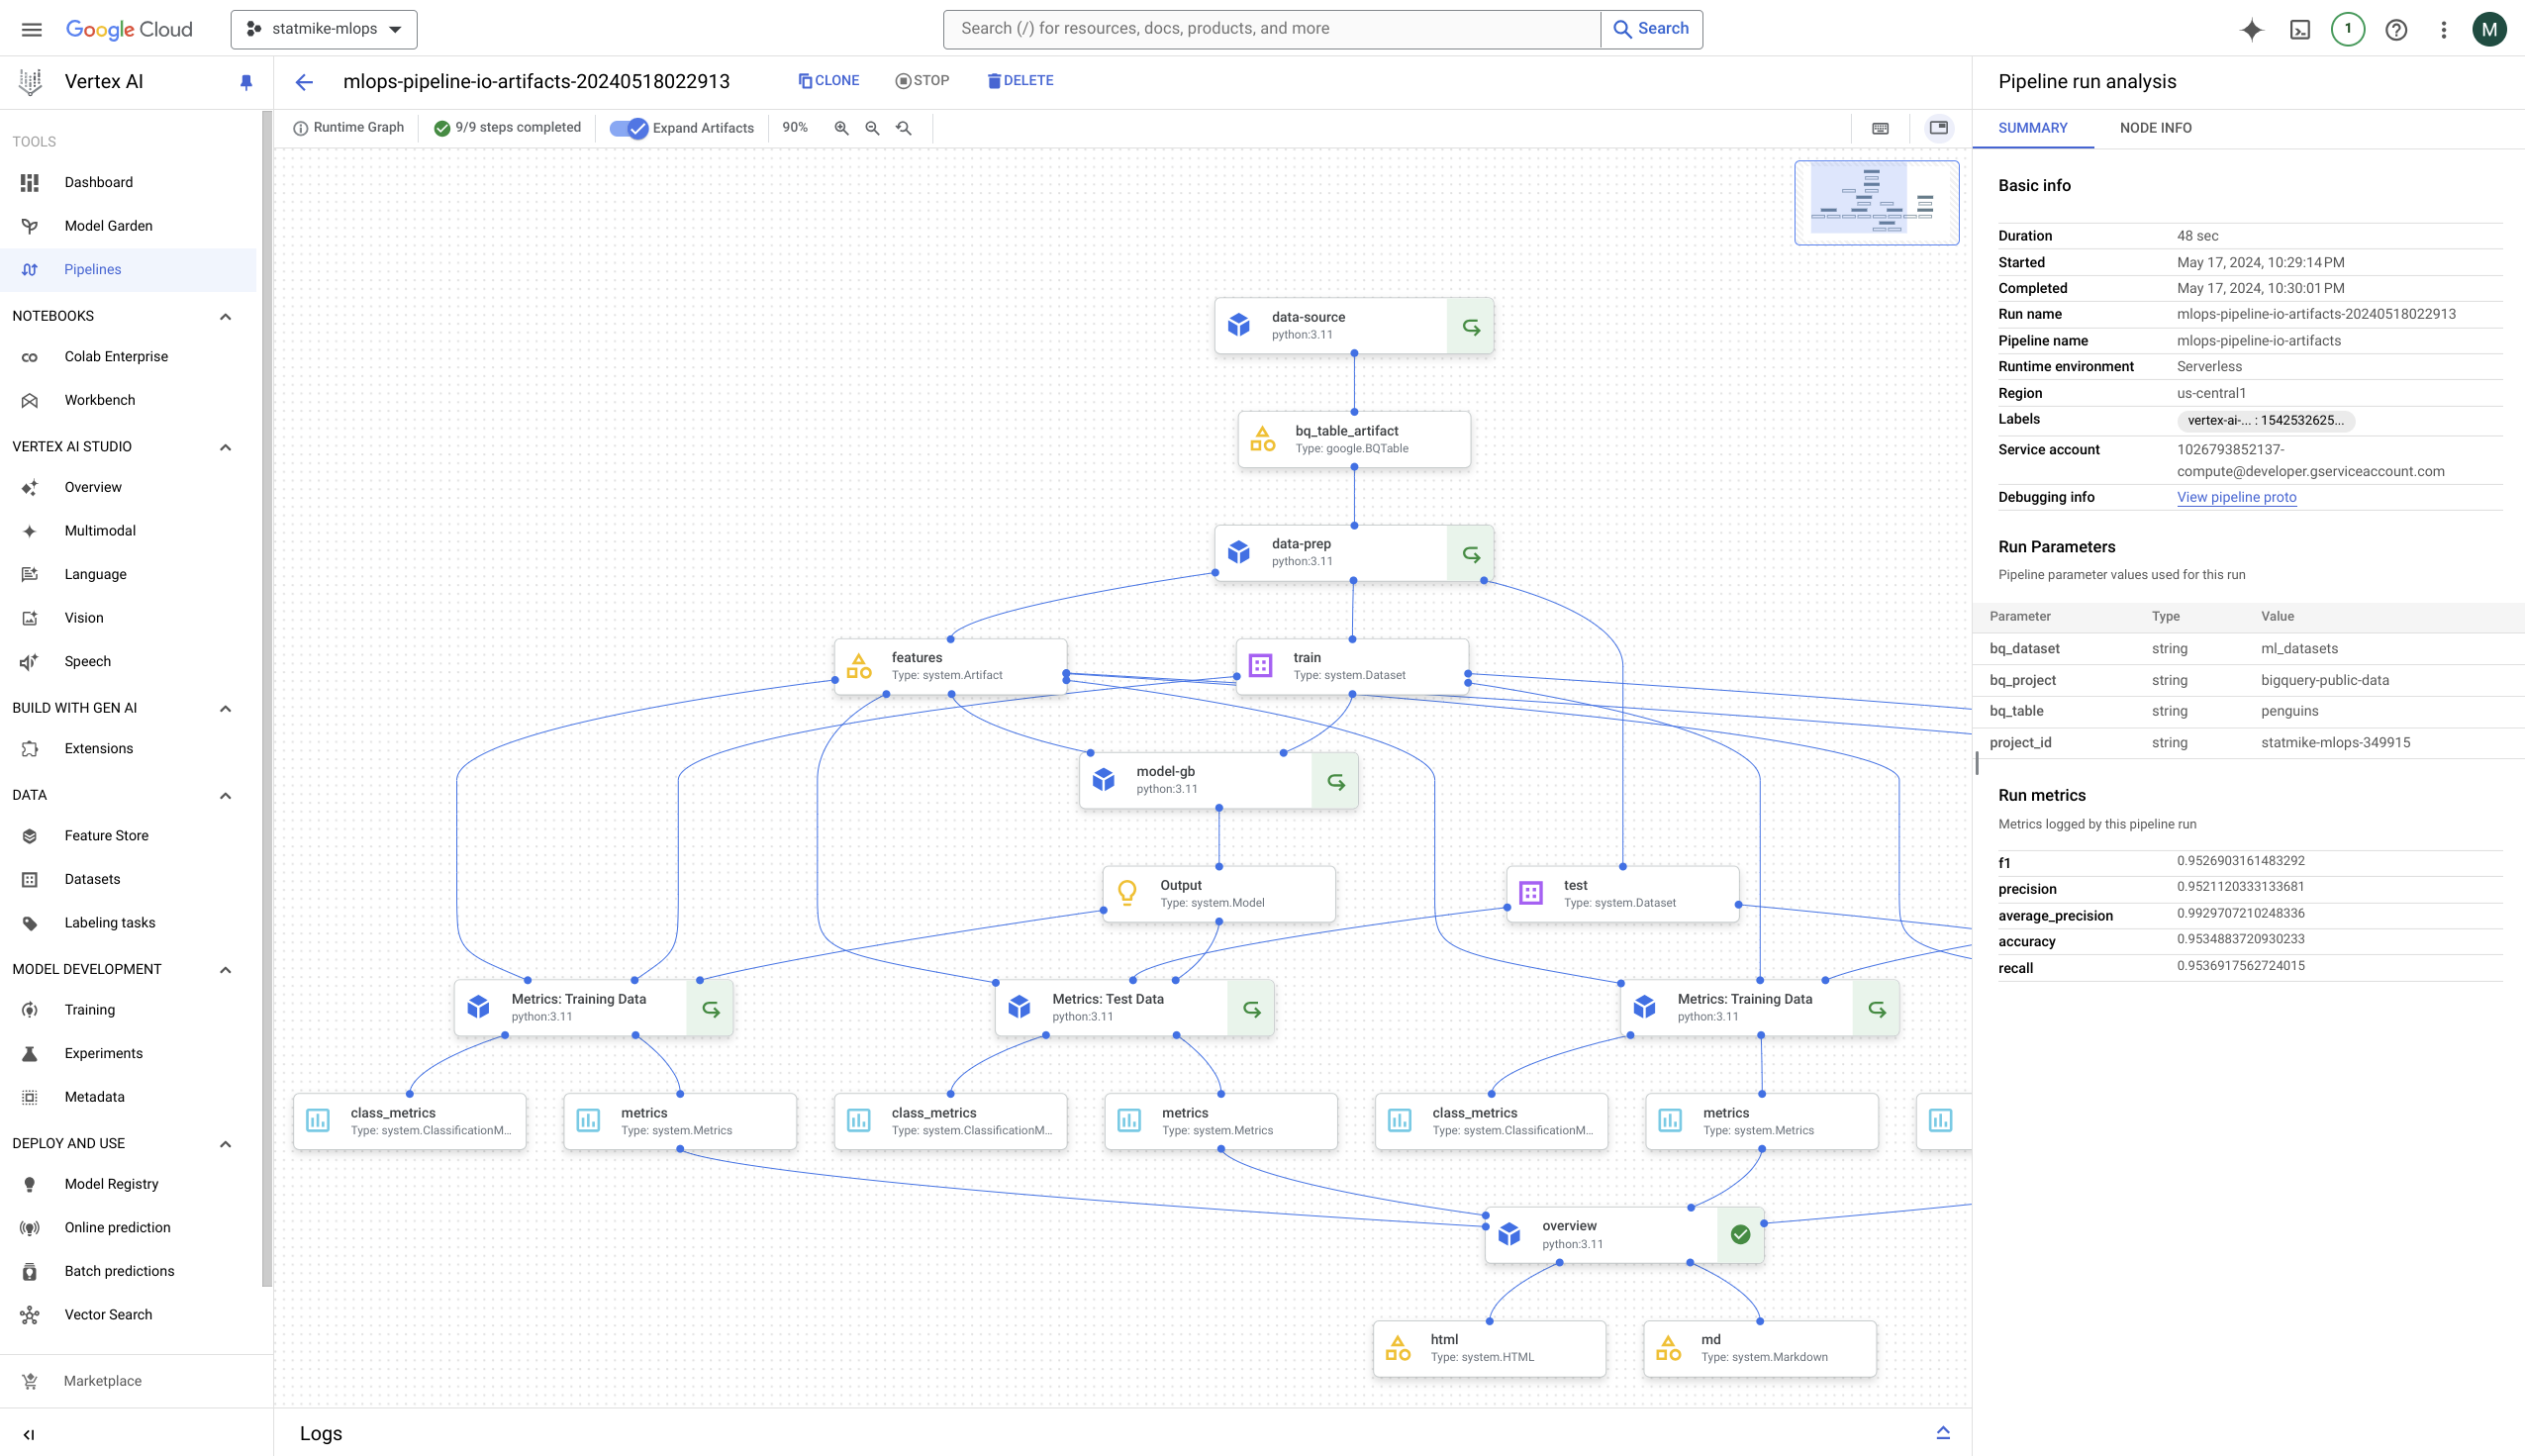
</center><p>
    
**BigQuery Table Artifact (`google.BQTable`):**
<p><center>
    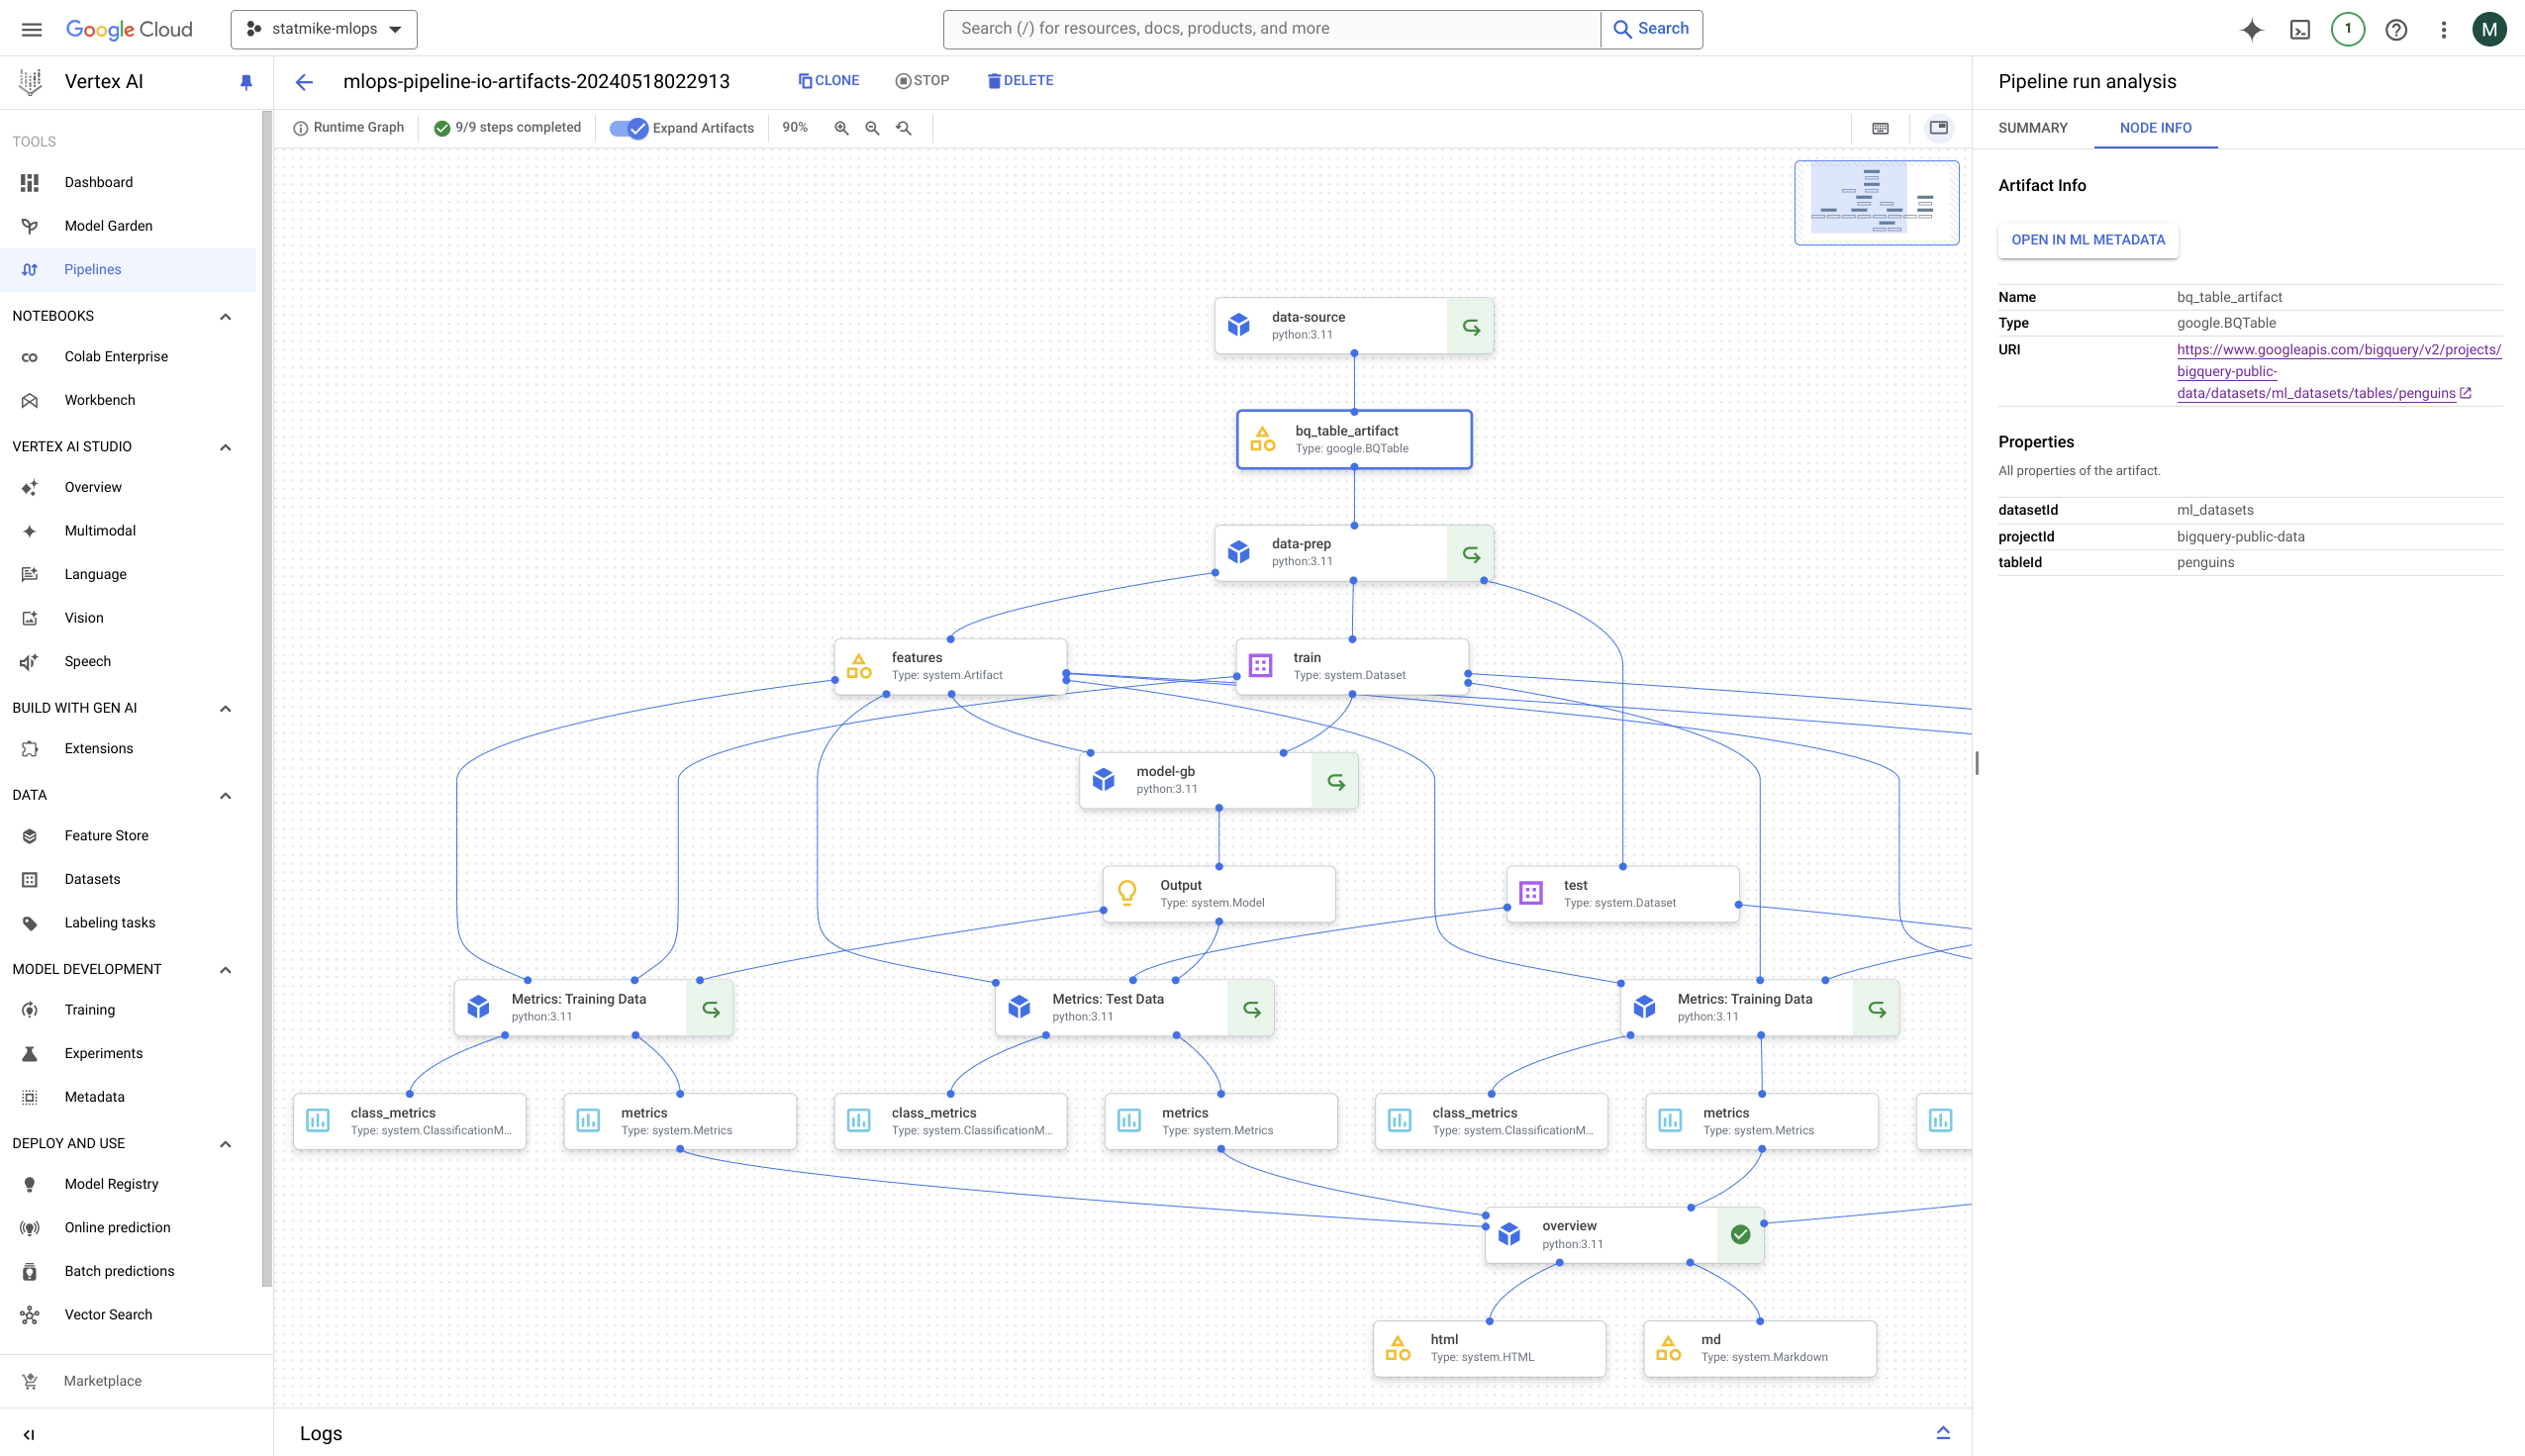
</center><p>
    
**KFP Artifact from `kfp.dsl.Artifact` (`system.Artifact`):**
<p><center>
    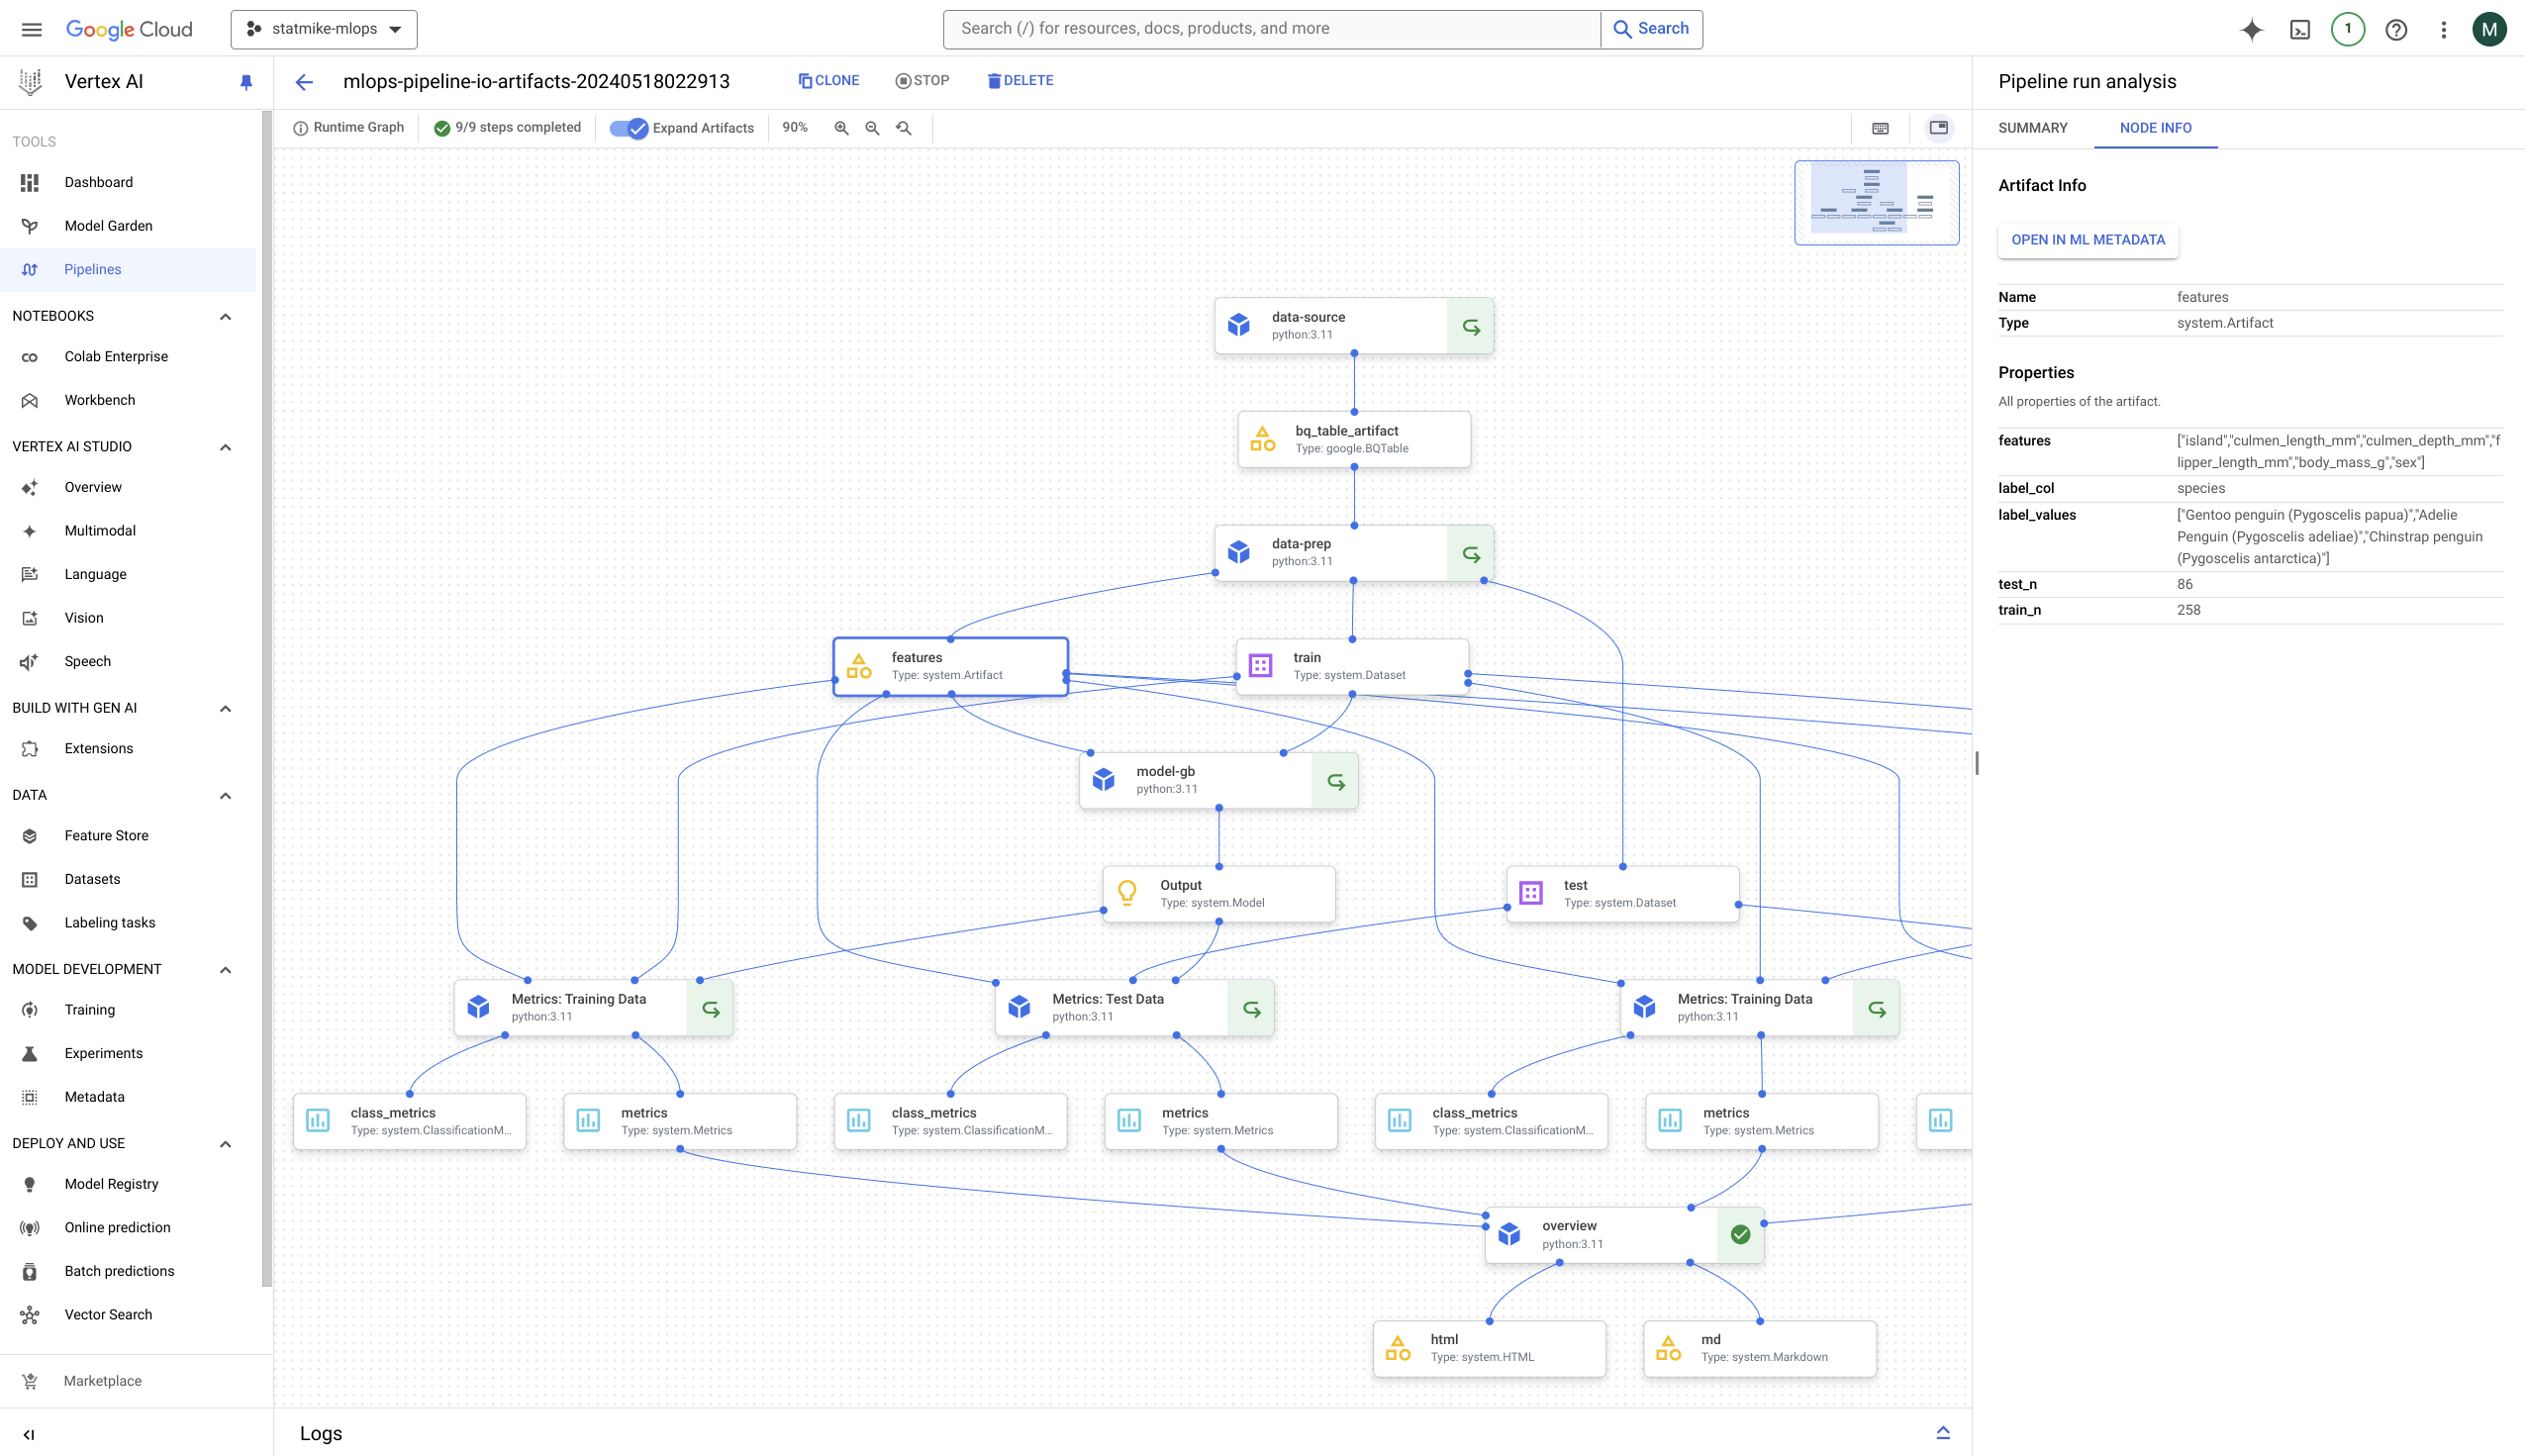
</center><p>
    
**KFP Artifact from `kfp.dsl.Dataset` (`system.Dataset`):**
<p><center>
    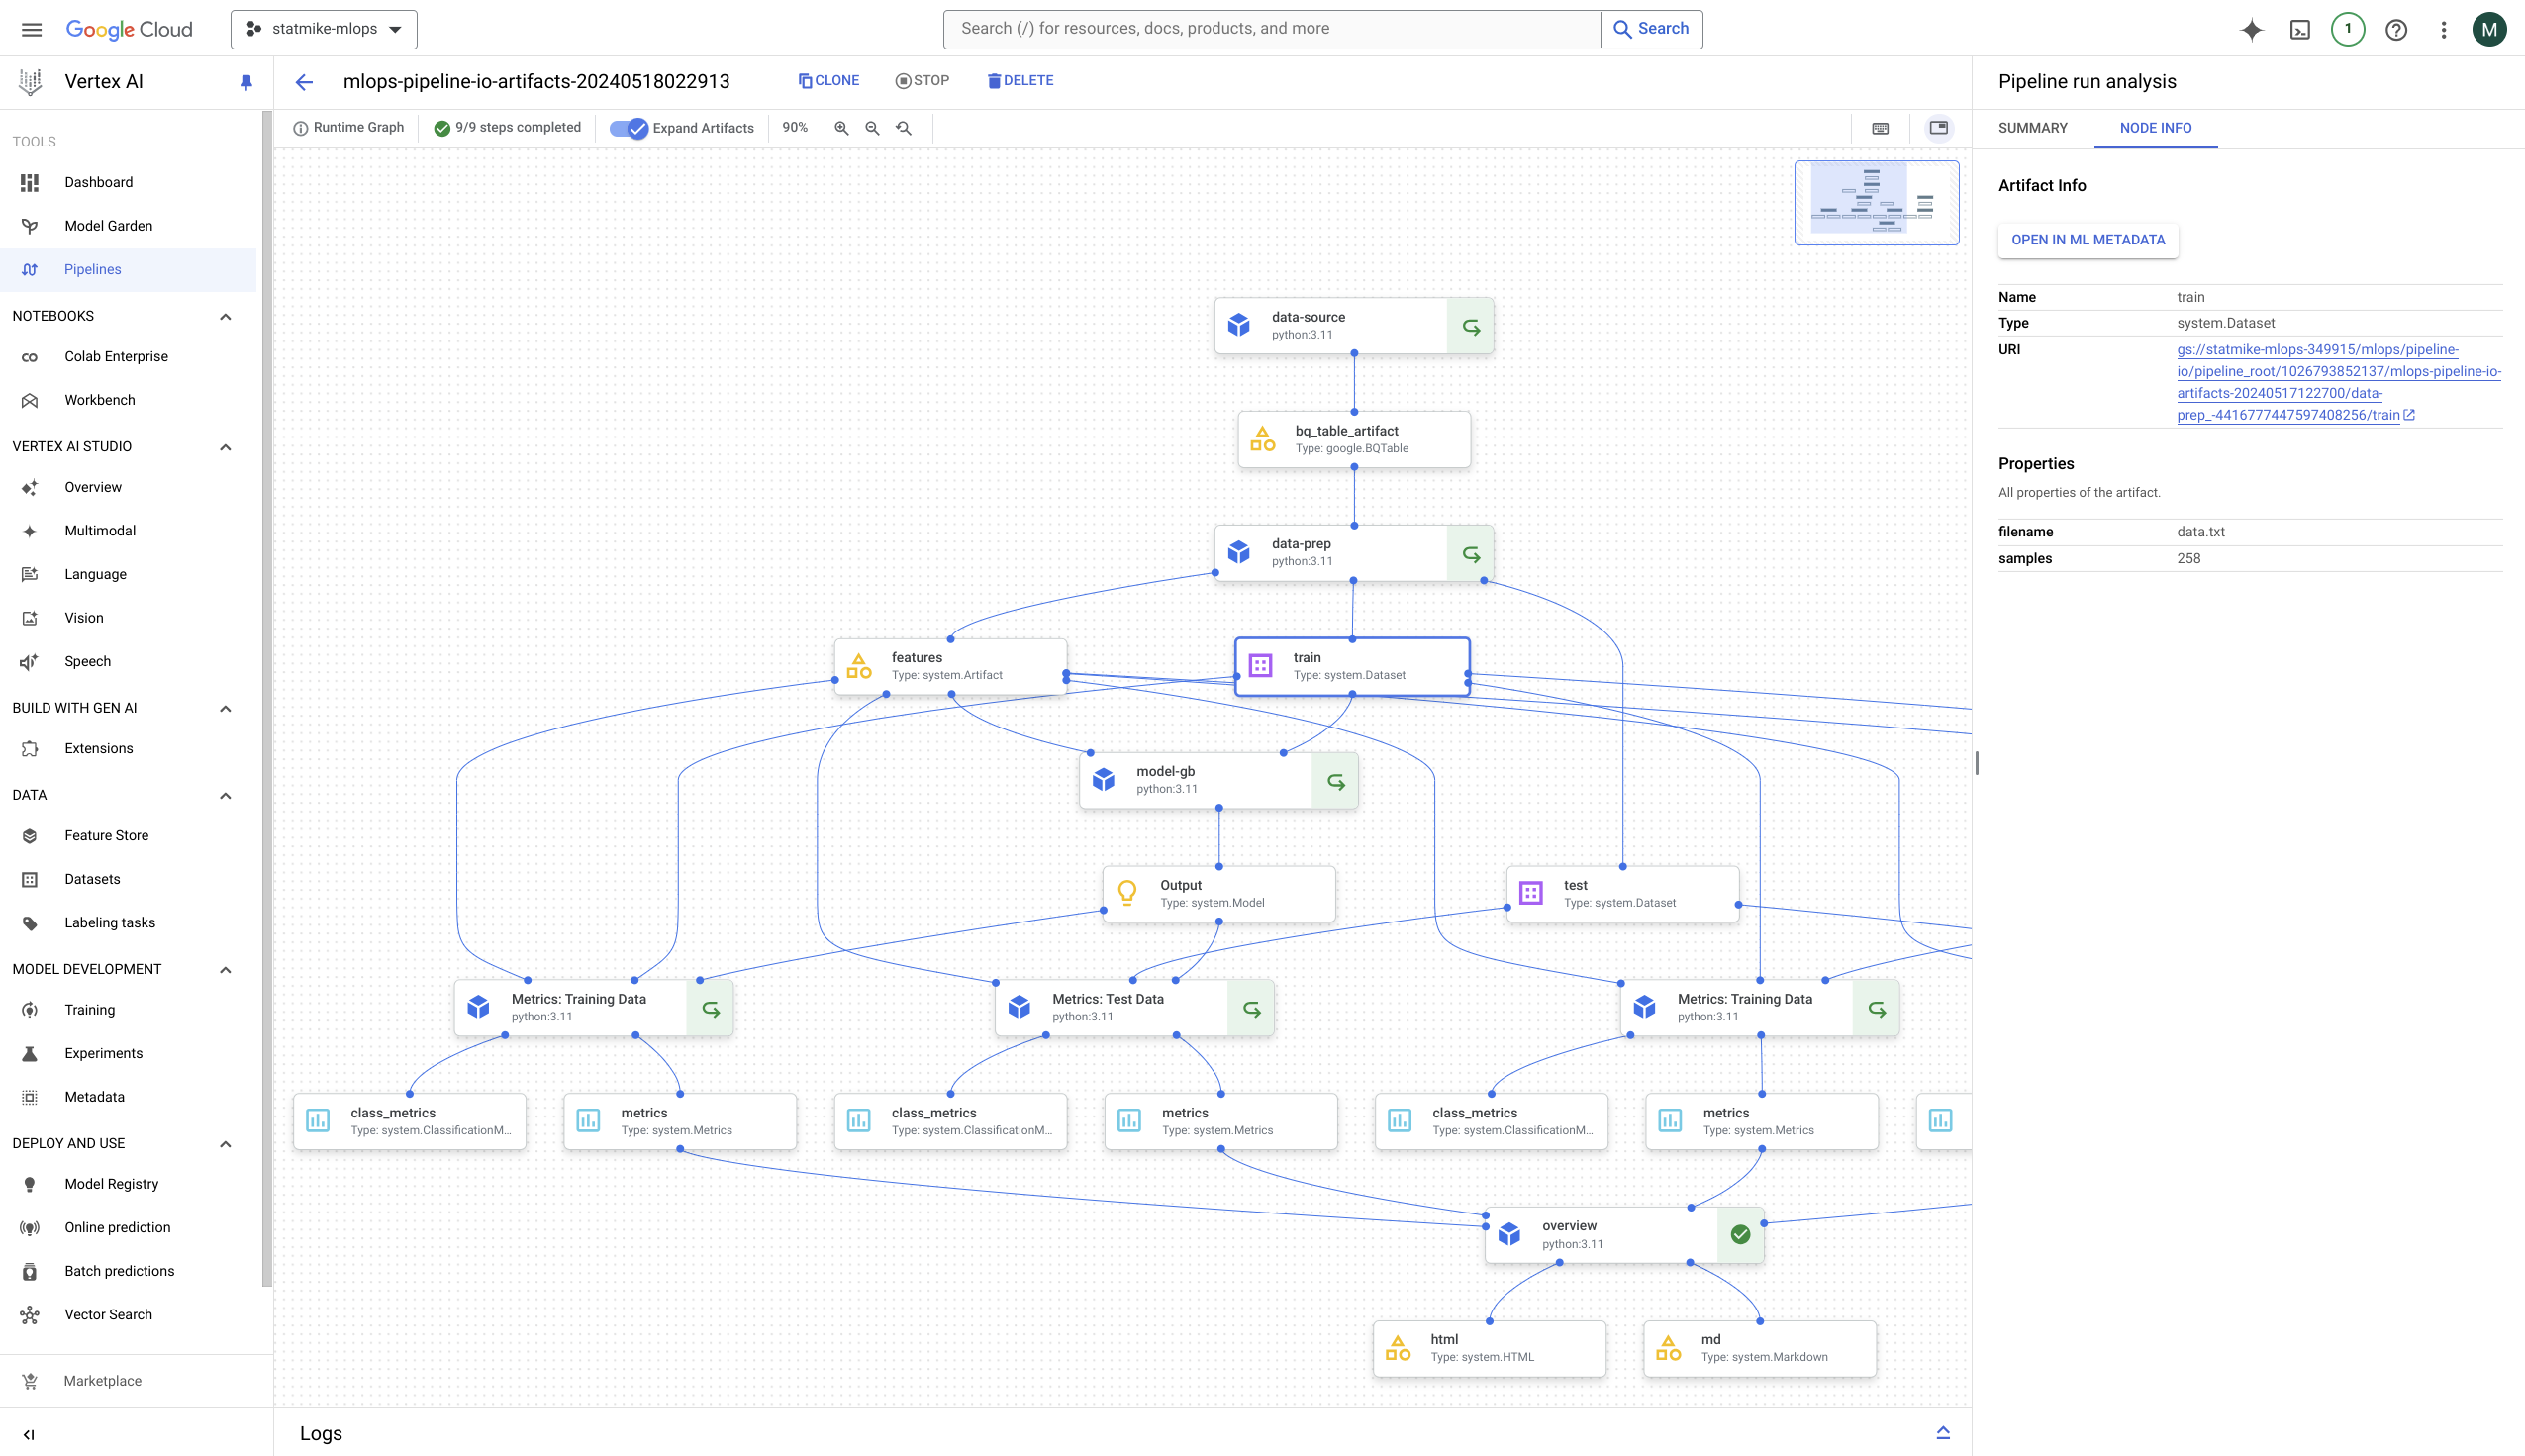
</center><p>
    
**KFP Artifact from `kfp.dsl.Model` (`system.Model`):**
<p><center>
    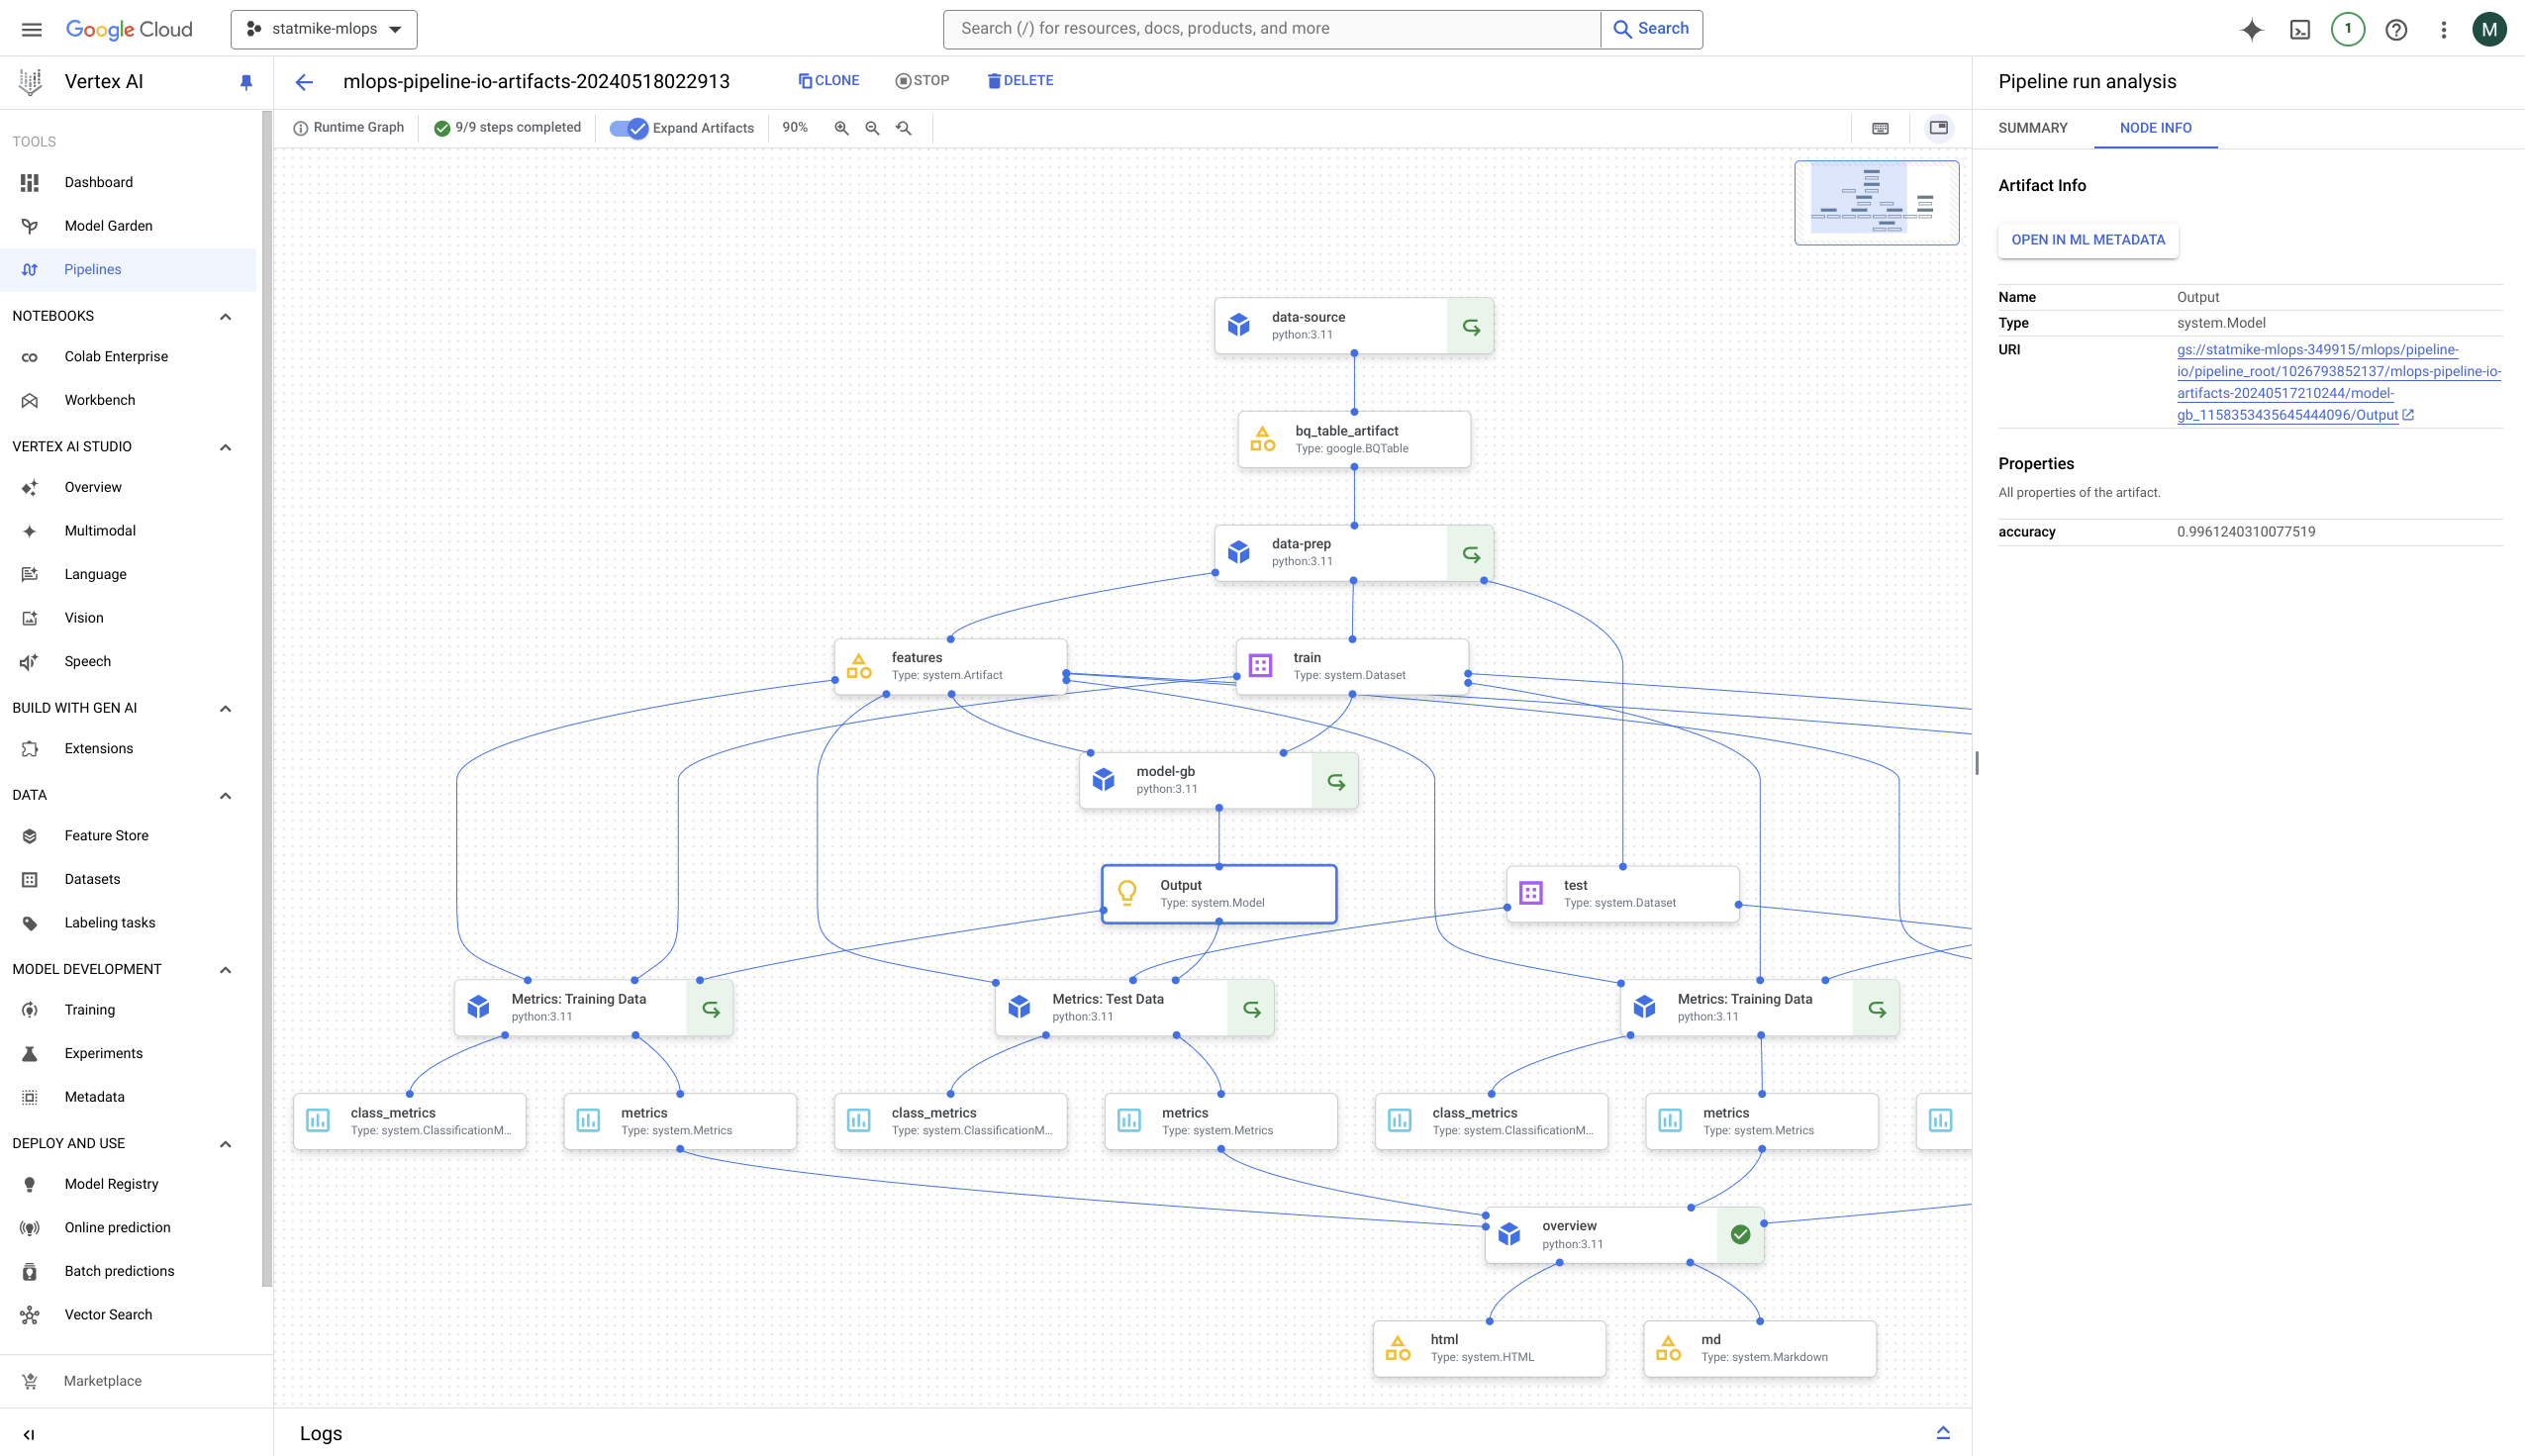
</center><p>
    
**KFP Artifact from `kfp.dsl.Metrics` (`system.Metrics`):**
<p><center>
    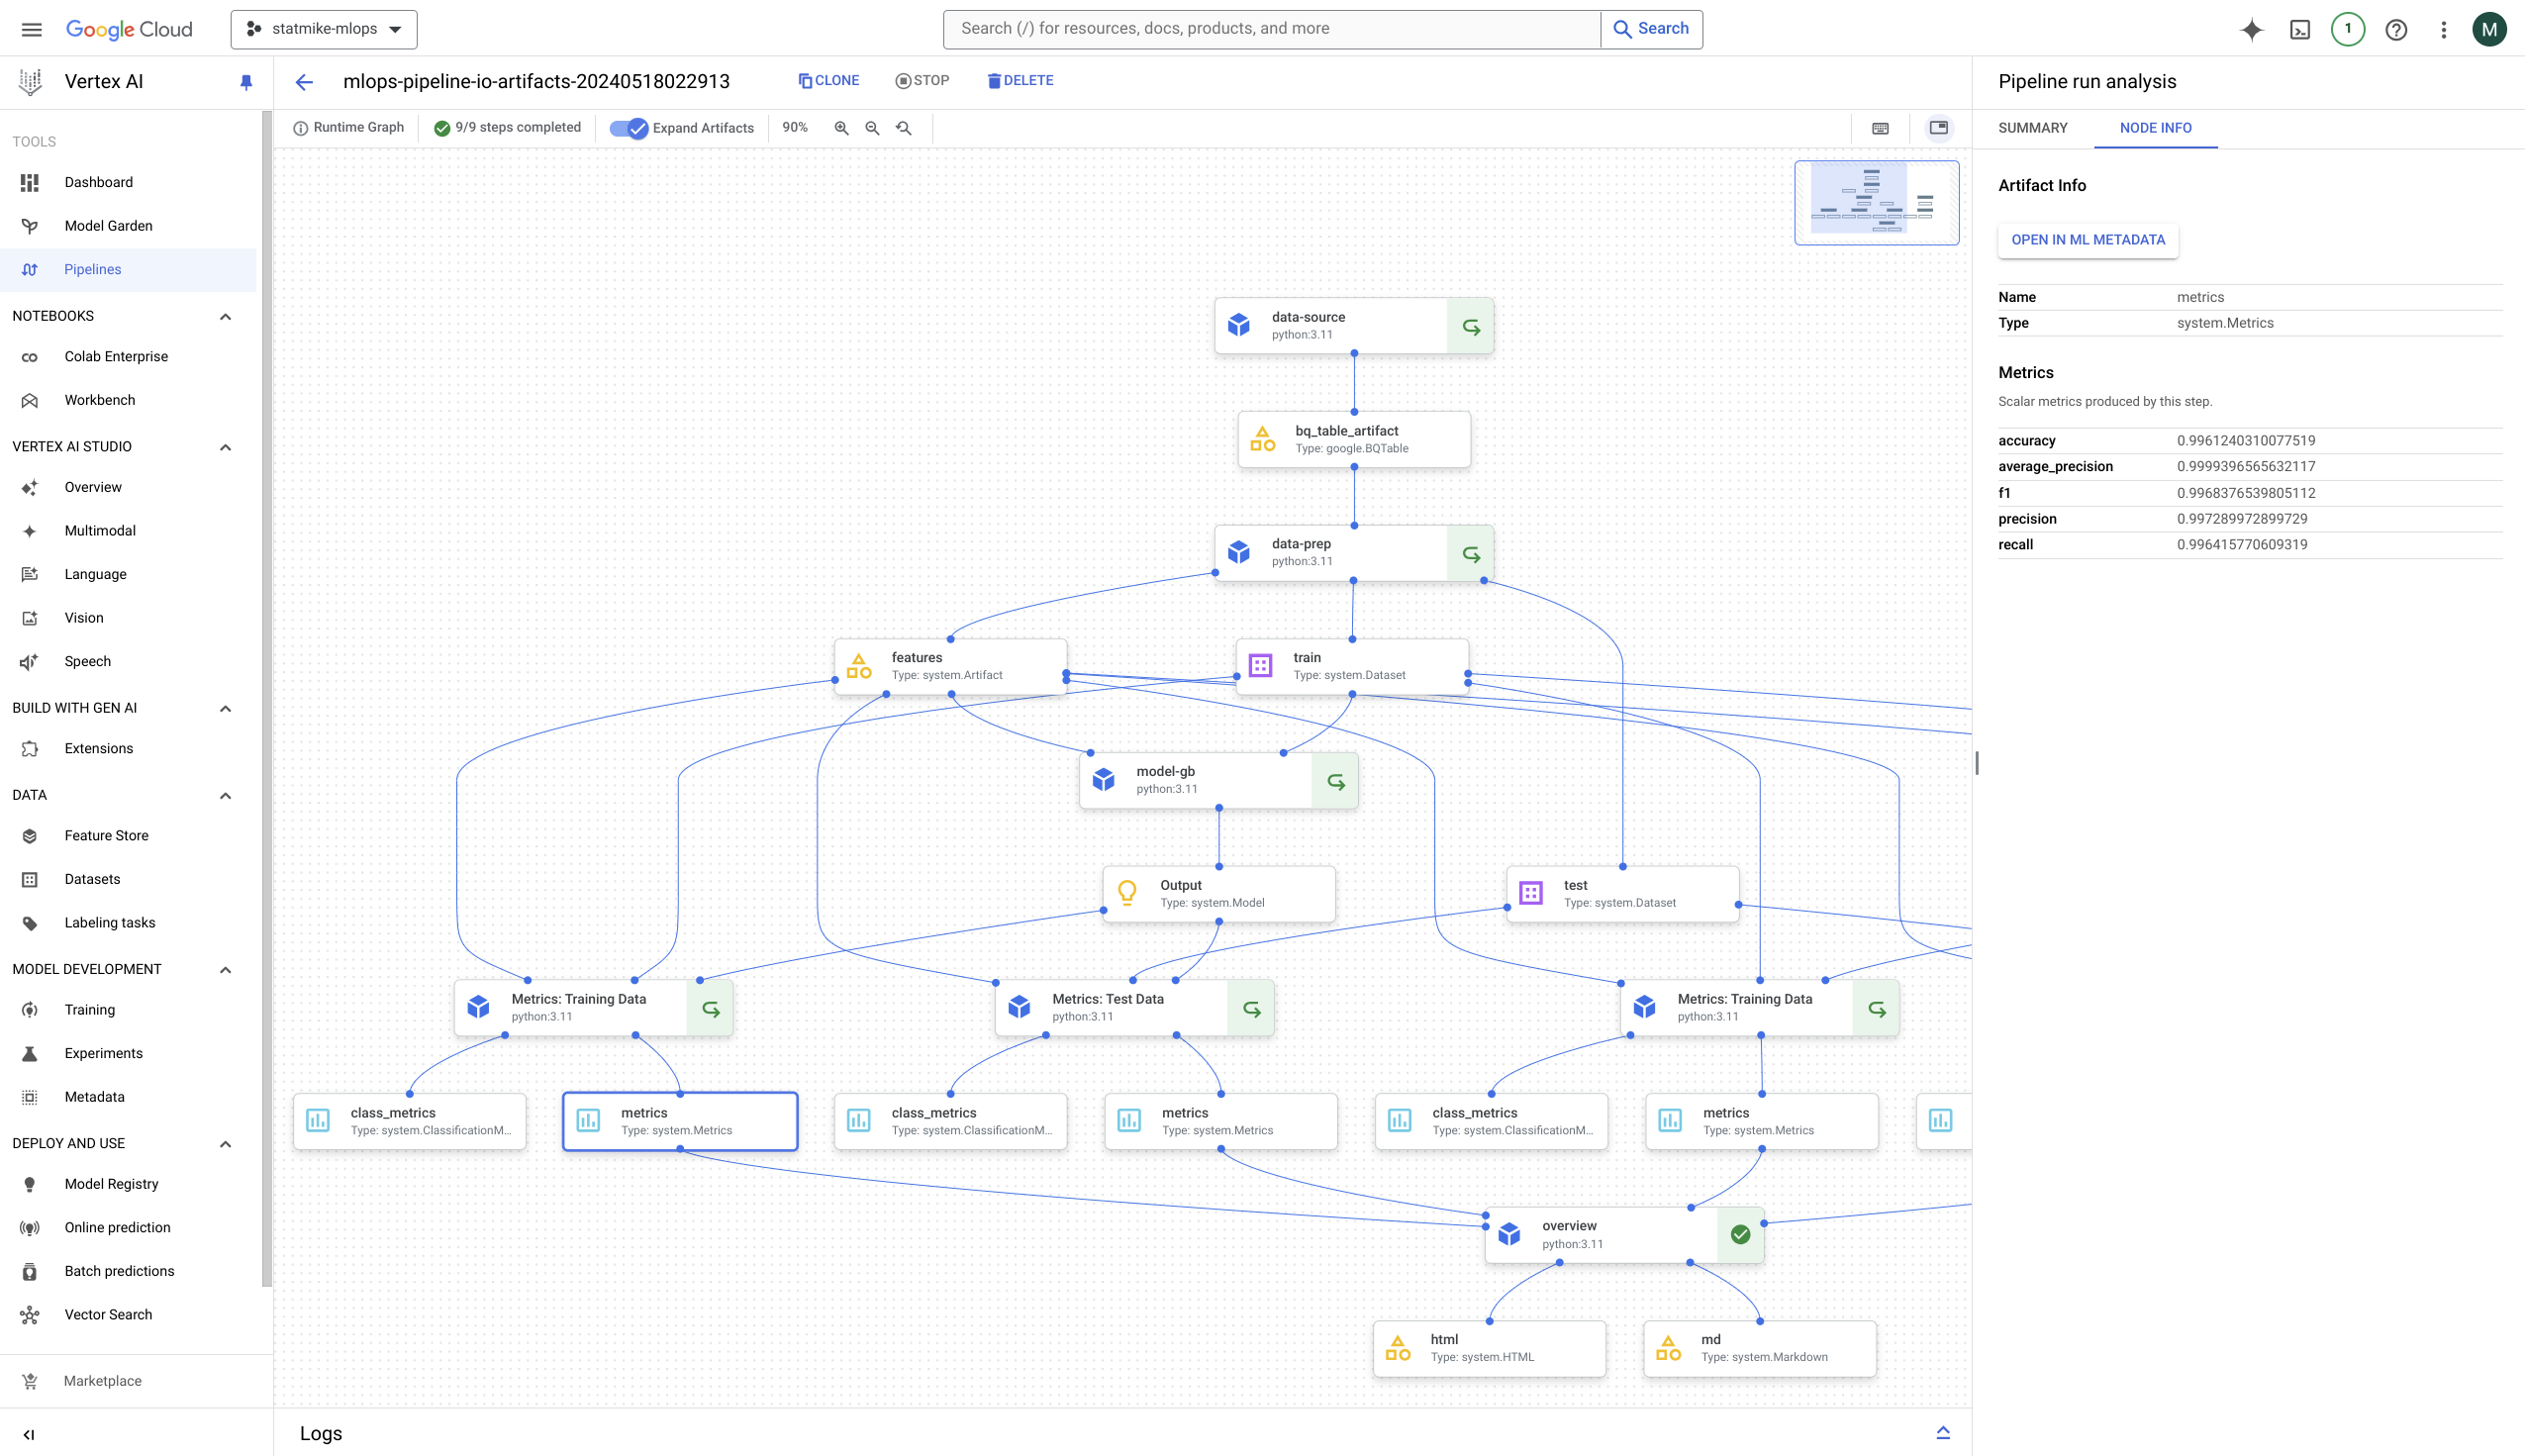
</center><p>
    
**KFP Artifact from `kfp.dsl.ClassificationMetrics` (`system.ClassificationMetrics`):**
<p><center>
    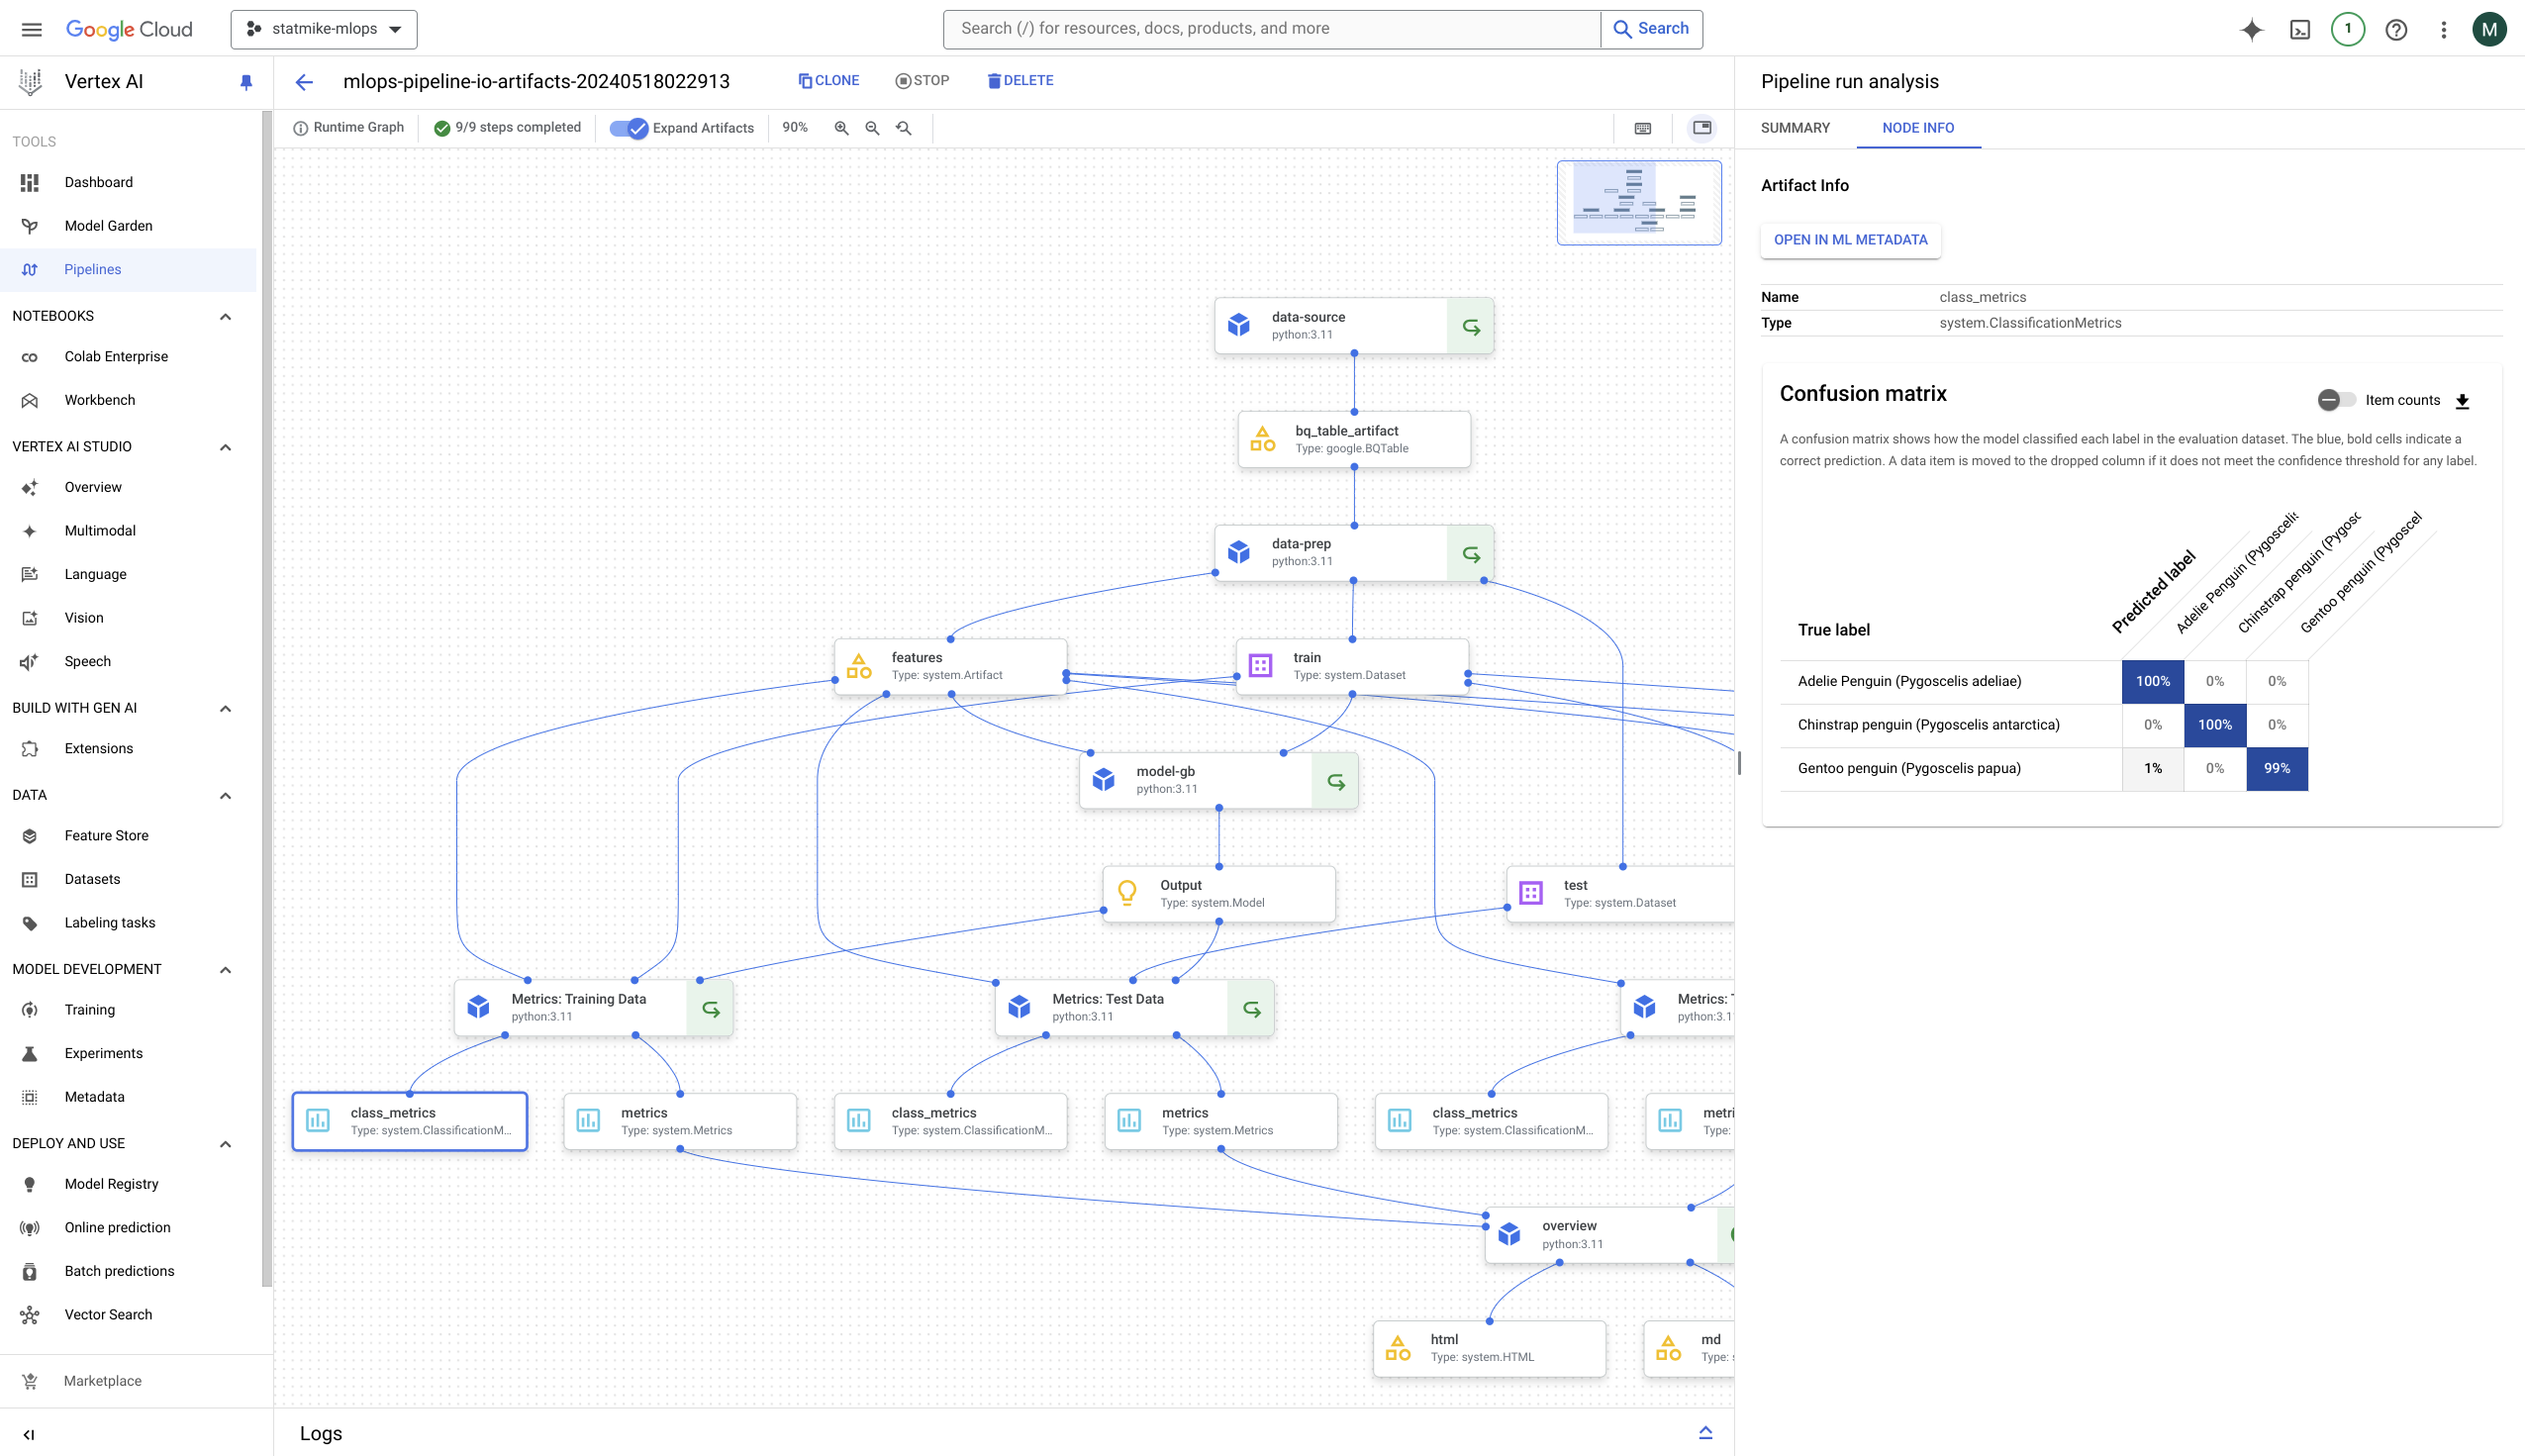
</center><p>
    
**KFP Artifact from `kfp.dsl.HTML` (`system.HTML`):**
<p><center>
    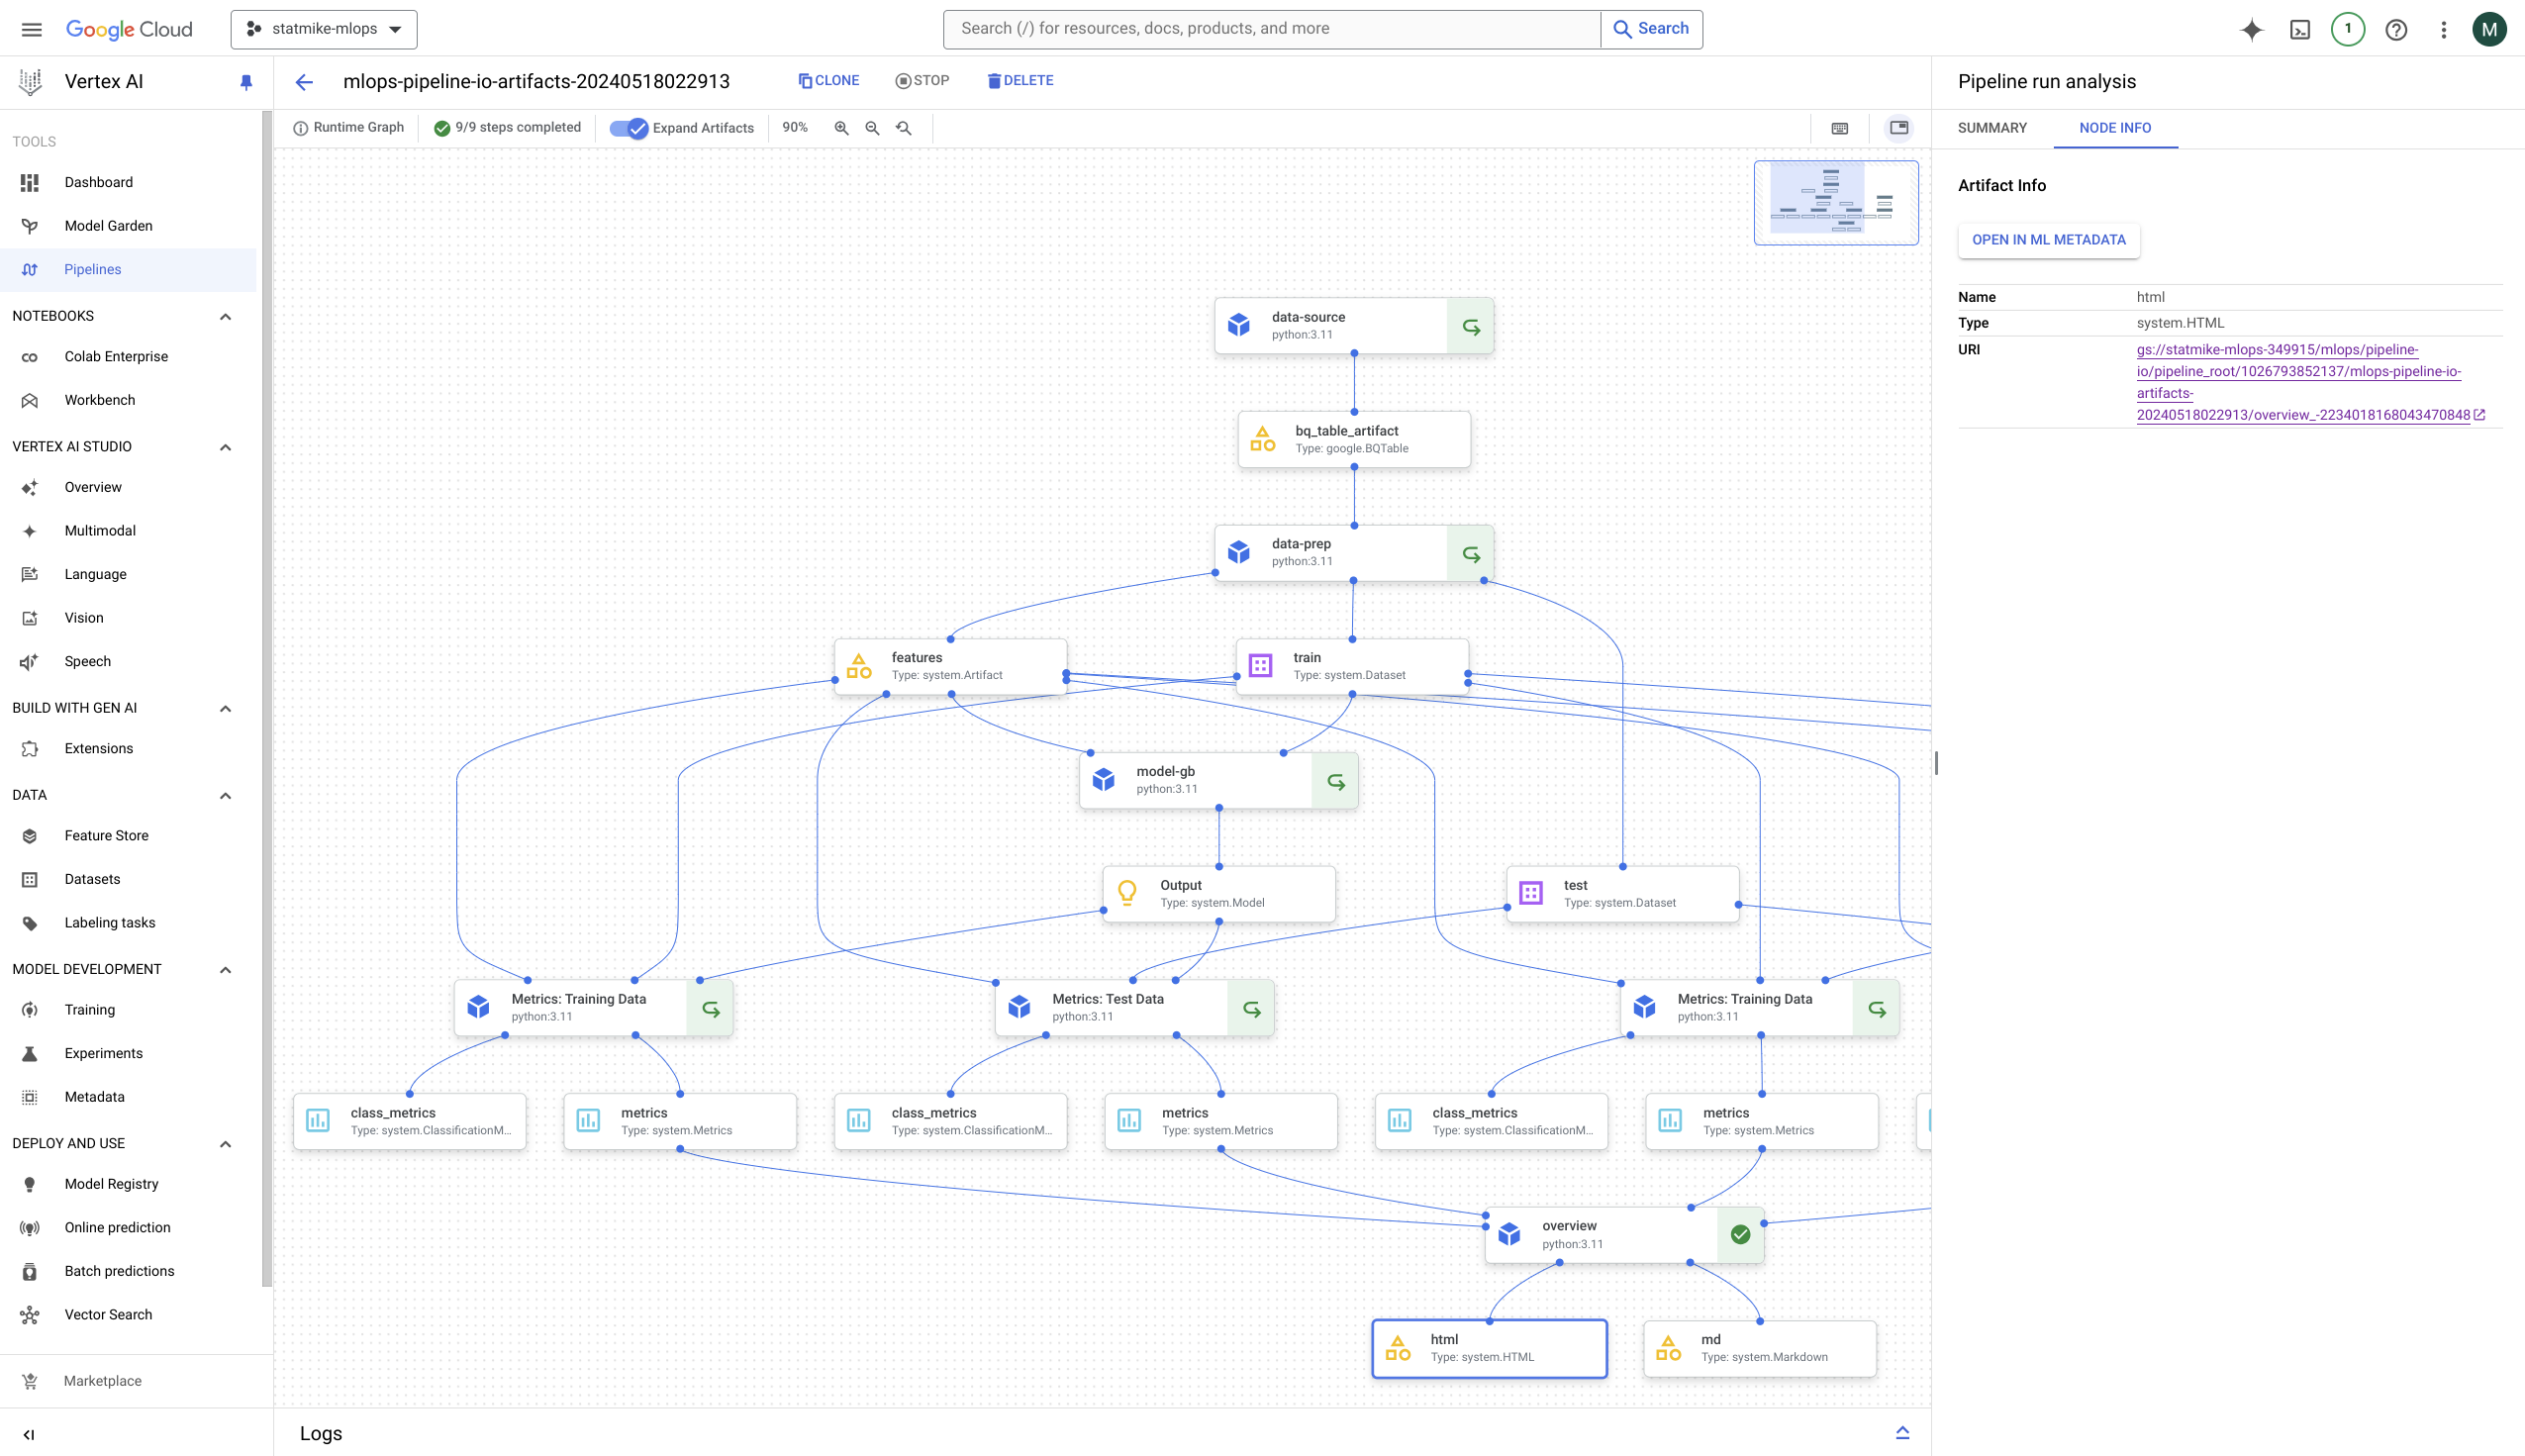
</center><p>
    
**KFP Artifact from `kfp.dsl.Markdown` (`system.Markdown`):**
<p><center>
    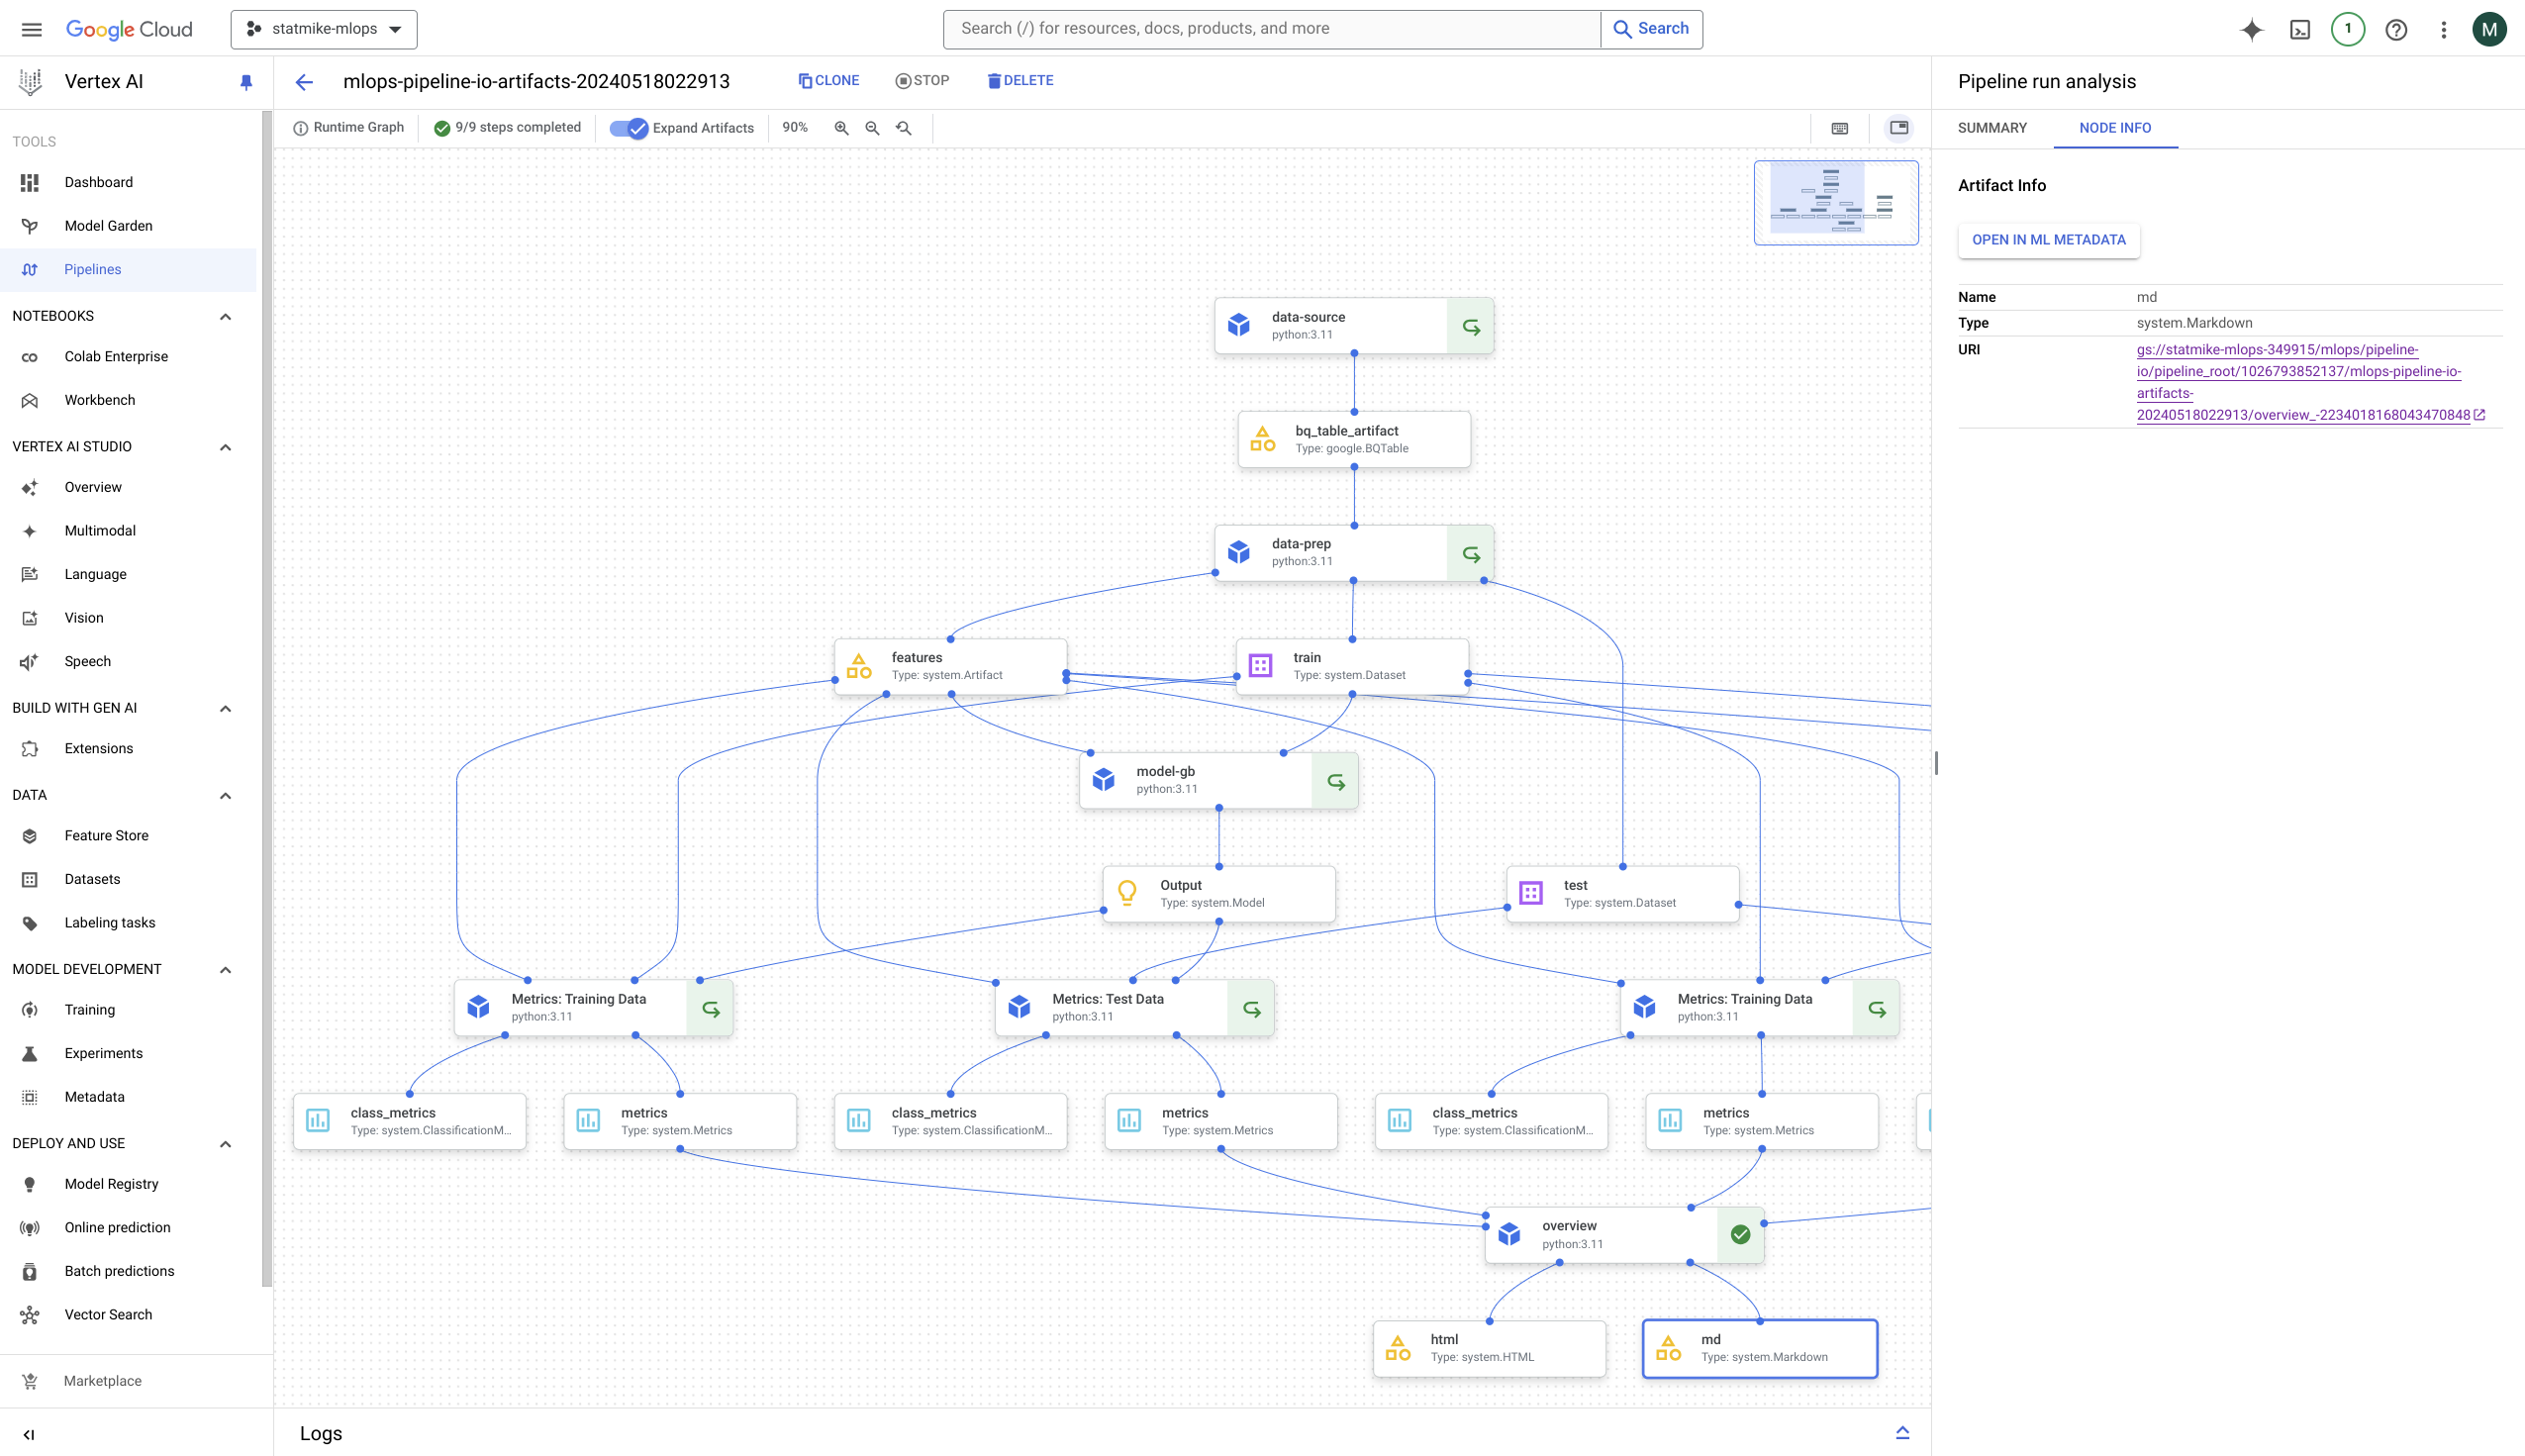
</center><p>    

---
## Artifacts: Vertex AI ML Metadata


Pipeline jobs are runs of a pipeline.  These jobs are made of tasks, the running of a commponent.  And some tasks consume and/or produce artifacts.  These artifacts are automatically stored in [Vertex AI ML Metadata](https://cloud.google.com/vertex-ai/docs/ml-metadata/introduction).  This system tracks lineage of the ML artifacts to understand changes over time and the downstream usage of these artifacts.

This section will cover the retrieval of Artifact metadata.

#### Retrieve Artifact Info From `PipelineJob`

In [800]:
# for a specific component
pipeline_job.to_dict()['jobDetail']['taskDetails'][2]['execution']['metadata']

{'vmlmd_lineage_integration': {'pipeline_run_component': {'location_id': 'us-central1',
   'task_name': 'metrics-3',
   'pipeline_run_id': 'mlops-pipeline-io-artifacts-20240518010459',
   'parent_task_names': ['mlops-pipeline-io-artifacts-20240518010459'],
   'project_id': 'statmike-mlops-349915'}},
 'vertex-ai-pipelines-artifact-argument-binding': {'output:class_metrics': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/615665522915101219'],
  'input:model': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/3530218072467574516'],
  'input:features': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/16743324060914490471'],
  'input:data': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/13338712458302091632'],
  'output:metrics': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/14355593135453238345']}}

In [803]:
# artifacts from the component
artifact_id = pipeline_job.to_dict()['jobDetail']['taskDetails'][2]['execution']['metadata']['vertex-ai-pipelines-artifact-argument-binding']#['output:Output'][0]
artifact_id

{'output:class_metrics': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/615665522915101219'],
 'input:model': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/3530218072467574516'],
 'input:features': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/16743324060914490471'],
 'input:data': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/13338712458302091632'],
 'output:metrics': ['projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/14355593135453238345']}

In [804]:
artifact = aiplatform.Artifact.get(resource_id = artifact_id['input:model'][0])

In [805]:
artifact

resource name: projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/3530218072467574516
uri: gs://statmike-mlops-349915/mlops/pipeline-io/pipeline_root/1026793852137/mlops-pipeline-io-artifacts-20240517210244/model-rf_-8065018601209331712/Output
schema_title:system.Model

In [806]:
artifact.uri

'gs://statmike-mlops-349915/mlops/pipeline-io/pipeline_root/1026793852137/mlops-pipeline-io-artifacts-20240517210244/model-rf_-8065018601209331712/Output'

In [807]:
artifact.metadata

{'accuracy': 0.9806201550387597}

In [811]:
artifact.display_name

'Output'

In [808]:
artifact.lineage_console_uri

'https://console.cloud.google.com/vertex-ai/locations/us-central1/metadata-stores/default/artifacts/3530218072467574516?project=statmike-mlops-349915'

**Vertex AI Console ML Metadata Review:**
<p><center>
    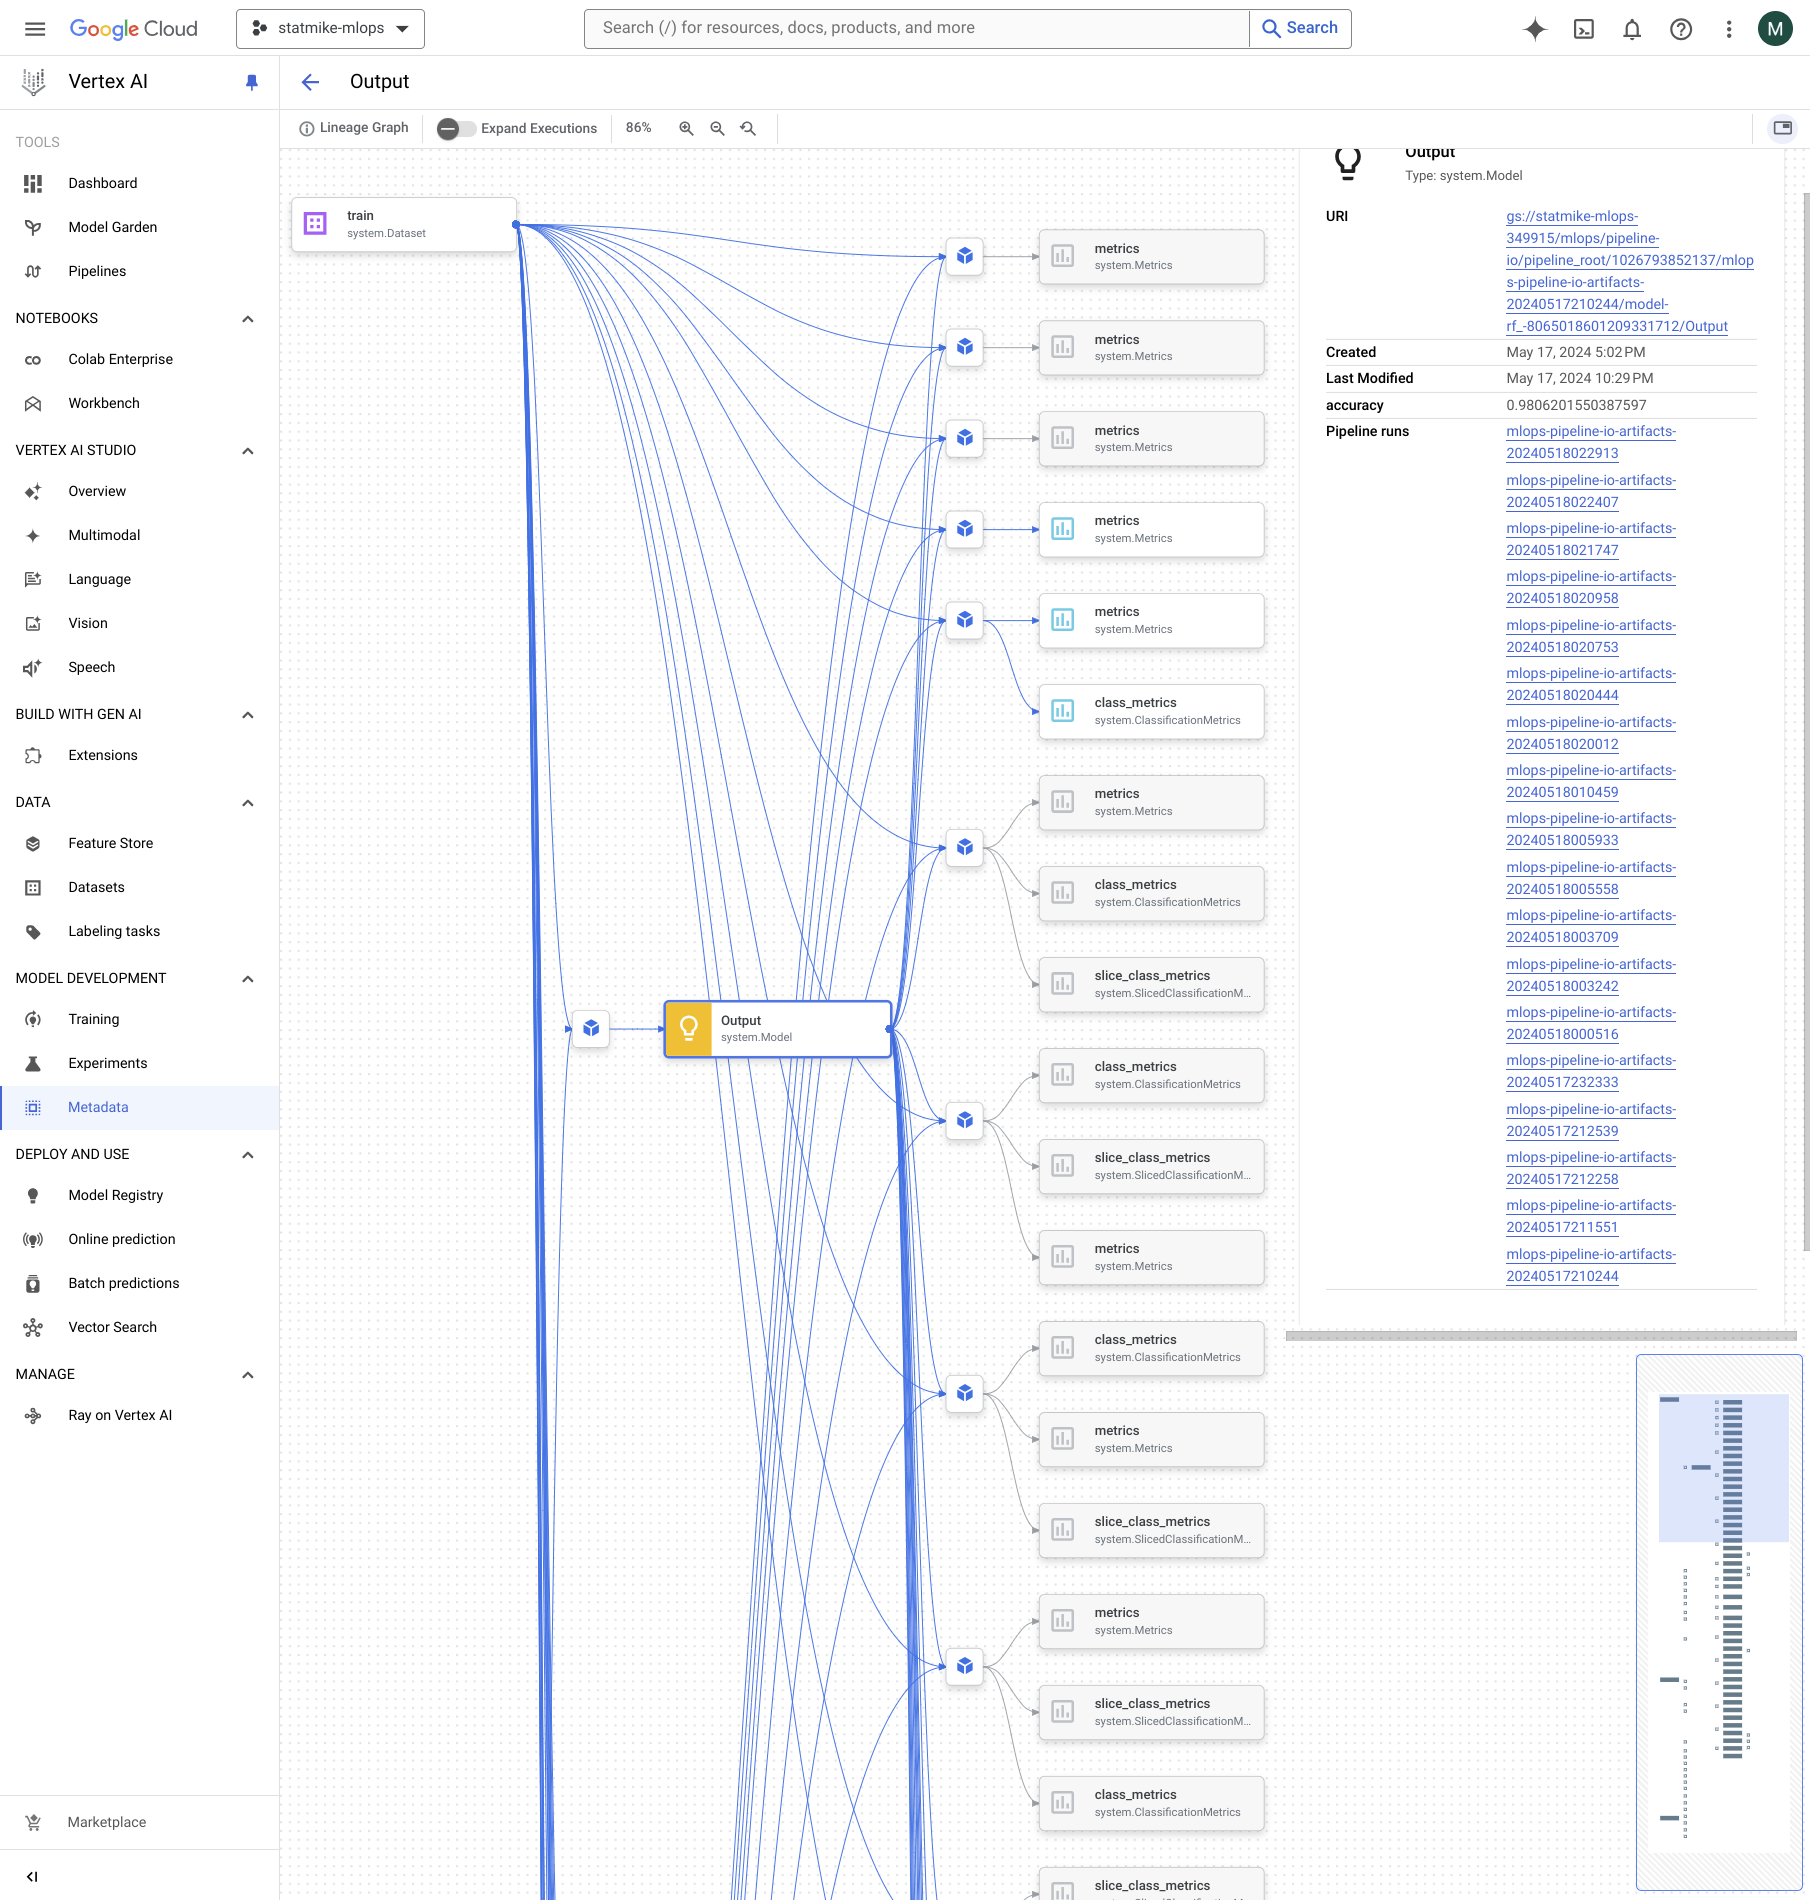
</center><p>

#### Retrieve Pipeline Artifacts Vertex AI SDK

- [`aiplatform.Artifact()`](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Artifact)
- An [Overview of the filter syntax](https://cloud.google.com/vertex-ai/docs/ml-metadata/analyzing#filters)

In [814]:
artifacts = aiplatform.Artifact.list(
    filter = "display_name=\"Output\""
)

In [819]:
len(artifacts)

22

In [828]:
artifacts = aiplatform.Artifact.list(
    filter = "display_name=\"Output\" AND create_time>\"2024-05-19\""
)

In [829]:
len(artifacts)

1

In [830]:
artifacts[0]

resource name: projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/12015835593073198771
uri: https://www.kubeflow.org/docs/components/pipelines/v2/data-types/artifacts/#artifact-types
schema_title:system.Artifact

In [831]:
type(artifacts[0])

google.cloud.aiplatform.metadata.artifact.Artifact

In [832]:
artifacts[0].metadata

{'ex_bool': True,
 'ex_float': 67.894,
 'ex_str': "'a string from the console'",
 'ex_list': [1.0, 2.0, 6.0, 89.0],
 'ex_int': 739495.0}

In [833]:
artifacts[0].lineage_console_uri

'https://console.cloud.google.com/vertex-ai/locations/us-central1/metadata-stores/default/artifacts/12015835593073198771?project=1026793852137'

#### Query Artifacts: Model with Accuracy > 0.987

In [838]:
artifacts = aiplatform.Artifact.list(
    filter = "schema_title=\"system.Model\" AND metadata.accuracy.number_value>0.987"
)

In [839]:
artifacts

 resource name: projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/6882445020641204841
 uri: gs://statmike-mlops-349915/mlops/pipeline-io/pipeline_root/1026793852137/mlops-pipeline-io-artifacts-20240517210244/model-gb_1158353435645444096/Output
 schema_title:system.Model,
 resource name: projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/8280931390702315684
 uri: gs://statmike-mlops-349915/mlops/pipeline-io/pipeline_root/1026793852137/mlops-pipeline-io-artifacts-20240517152923/model-gb_-8736969739361845248/Output
 schema_title:system.Model]

In [840]:
artifacts[0].to_dict()

{'name': 'projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/6882445020641204841',
 'displayName': 'Output',
 'uri': 'gs://statmike-mlops-349915/mlops/pipeline-io/pipeline_root/1026793852137/mlops-pipeline-io-artifacts-20240517210244/model-gb_1158353435645444096/Output',
 'etag': '1715999356657',
 'createTime': '2024-05-17T21:02:49.784Z',
 'updateTime': '2024-05-18T02:29:16.657Z',
 'state': 'LIVE',
 'schemaTitle': 'system.Model',
 'schemaVersion': '0.0.1',
 'metadata': {'accuracy': 0.9961240310077519}}